In [174]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

from sklearn.metrics import davies_bouldin_score
from sklearn.utils import check_random_state
from sklearn.utils import check_X_y
from sklearn.utils import _safe_indexing
from sklearn.metrics.pairwise import pairwise_distances_chunked
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import LabelEncoder


In [175]:
def check_number_of_labels(n_labels, n_samples):
    """Check that number of labels are valid.

    Parameters
    ----------
    n_labels : int
        Number of labels.

    n_samples : int
        Number of samples.
    """
    if not 1 < n_labels < n_samples:
        raise ValueError(
            "Number of labels is %d. Valid values are 2 to n_samples - 1 (inclusive)"
            % n_labels
        )

def davies_bouldin_score(X, labels,centroids):
    """Compute the Davies-Bouldin score.

    The score is defined as the average similarity measure of each cluster with
    its most similar cluster, where similarity is the ratio of within-cluster
    distances to between-cluster distances. Thus, clusters which are farther
    apart and less dispersed will result in a better score.

    The minimum score is zero, with lower values indicating better clustering.

    Read more in the :ref:`User Guide <davies-bouldin_index>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        A list of ``n_features``-dimensional data points. Each row corresponds
        to a single data point.

    labels : array-like of shape (n_samples,)
        Predicted labels for each sample.

    Returns
    -------
    score: float
        The resulting Davies-Bouldin score.

    References
    ----------
    .. [1] Davies, David L.; Bouldin, Donald W. (1979).
       `"A Cluster Separation Measure"
       <https://ieeexplore.ieee.org/document/4766909>`__.
       IEEE Transactions on Pattern Analysis and Machine Intelligence.
       PAMI-1 (2): 224-227
    """
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    #centroids = np.zeros((n_labels, len(X[0])), dtype=float)
    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        #centroid = cluster_k.mean(axis=0)
        #centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(cluster_k, [centroids[k]]))
    
    centroid_distances = pairwise_distances(centroids)
    

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    #centroid_distances[centroid_distances == 0] = np.inf
    centroid_distances[np.isclose(centroid_distances,0,rtol=1e-05, atol=1e-06)] = np.inf

    combined_intra_dists = intra_dists[:, None] + intra_dists
    print("dista intra: ",intra_dists[k],"centroid distances: ",centroid_distances)
    print("combined intra dist:",combined_intra_dists)
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)
    print("scores ",scores)
    return np.mean(scores)


In [176]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly3 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly4.pickle', 'rb') as handle:
    allPixelNDVIPoly4 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly6.pickle', 'rb') as handle:
    allPixelNDVIPoly6 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

with open('./pickles/kluster_centroids_3_c2.pickle', 'rb') as handle:
    centroids_3 = pickle.load(handle)

with open('./pickles/kluster_centroids_4_c2.pickle', 'rb') as handle:
    centroids_4 = pickle.load(handle)

with open('./pickles/kluster_centroids_6_c2.pickle', 'rb') as handle:
    centroids_6 = pickle.load(handle)

num_cluster = 2

In [177]:
allPixelNDVIPoly3 = allPixelNDVIPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

allPixelNDVIPoly4 = allPixelNDVIPoly4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
print(len(newResa4))

allPixelNDVIPoly6 = allPixelNDVIPoly6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]
print(len(newResa6))

1065
1700


In [178]:
# k-means su tutto l'asse temporale 

km_one3 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one3 = km_one3.fit_predict(allPixelNDVIPoly3)

km_one4 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one4 = km_one4.fit_predict(allPixelNDVIPoly4)

km_one6 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one6 = km_one6.fit_predict(allPixelNDVIPoly6)

In [179]:
print(len(allPixelNDVIPoly3[y_pred_one3 == 0][0]))
print(len(km_one3.cluster_centers_[0].ravel()))
print(np.linalg.norm(allPixelNDVIPoly3[y_pred_one3 == 0][0] - km_one3.cluster_centers_[0].ravel()))
print(dist.euclidean(allPixelNDVIPoly3[y_pred_one3 == 0][0],km_one3.cluster_centers_[0].ravel()))

150
150
1.4875373563042251
1.4875373563042251


In [180]:
distancefromC = []
centroids = []
for cluster in range(0,num_cluster):
    
    #
    ClusterTs = allPixelNDVIPoly3[y_pred_one3 == cluster]
    centroids = np.tile(km_one3.cluster_centers_[cluster].ravel(),(ClusterTs.shape[0],1))
    distancefromC.append(np.linalg.norm(ClusterTs - centroids,axis=1))

In [181]:
print(len(distancefromC[0]),len(distancefromC[1]))

533 938


# Coesione del TS

In [182]:
for cluster in range(0,num_cluster):
    print("cluster"+str(cluster))
    print(np.array(distancefromC[cluster]).mean())
    print(np.array(distancefromC[cluster]).std())



cluster0
0.3983831975975734
0.23879895848444946
cluster1
0.2829296657076909
0.10894201014921998


# Davies–Bouldin index

In [183]:
#Rese 3 
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one3.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",3)
print(davies_bouldin_score(allPixelNDVIPoly3,y_pred_one3,centroids))

#Resa 4
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one4.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",4)
print(davies_bouldin_score(allPixelNDVIPoly4,y_pred_one4,centroids))

#Resa 6
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one6.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",6)
print(davies_bouldin_score(allPixelNDVIPoly6,y_pred_one6,centroids))

indice dv del campo 3
dista intra:  0.28292966570769096 centroid distances:  [[       inf 0.74199663]
 [0.74199663        inf]]
combined intra dist: [[0.7967664  0.68131286]
 [0.68131286 0.56585933]]
scores  [0.91821557 0.91821557]
0.9182155745206129
indice dv del campo 4
dista intra:  0.6252891309260574 centroid distances:  [[       inf 1.34722084]
 [1.34722084        inf]]
combined intra dist: [[0.62463235 0.93760531]
 [0.93760531 1.25057826]]
scores  [0.69595517 0.69595517]
0.6959551693977397
indice dv del campo 6
dista intra:  0.4552118449019988 centroid distances:  [[       inf 2.41846363]
 [2.41846363        inf]]
combined intra dist: [[0.81206454 0.86124411]
 [0.86124411 0.91042369]]
scores  [0.35611208 0.35611208]
0.3561120797190385


# Andiamo a utilizzare le metriche su tutti i cluster delle varie curve

In [184]:
with open('./pickles/kmeans_total_3_c2.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_4_c2.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_6_c2.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/newSeries_total_3.pickle', 'rb') as handle:
    newSeries_total_3 = pickle.load(handle)

with open('./pickles/newSeries_total_4.pickle', 'rb') as handle:
    newSeries_total_4 = pickle.load(handle)

with open('./pickles/newSeries_total_6.pickle', 'rb') as handle:
    newSeries_total_6 = pickle.load(handle)

In [185]:
def calculateDistance(NDVIpoly,kmeans_total,centroid,cluster):
    ClusterTs = NDVIpoly[kmeans_total == cluster]
    return np.linalg.norm(ClusterTs - np.tile(centroid,(ClusterTs.shape[0],1)),axis=1)

In [196]:
x,y = 0,24
#print(centroids_3[x,y])
centroid_test = [centroids_3[x,y,0],centroids_3[x,y,1]]
davies_bouldin_score(newSeries_total_3[x,y],kmeans_total3[x,y],centroid_test)

dista intra:  0.35910676467968944 centroid distances:  [[1.46000966e-07 7.41429761e-01]
 [7.41429761e-01            inf]]
combined intra dist: [[0.5553585  0.63678601]
 [0.63678601 0.71821353]]
scores  [3.80380015e+06 8.58862223e-01]


1901900.5051780667

In [187]:


coesione_3 = np.zeros((int(155/5),int(155/5),num_cluster))
coesione_4 = np.zeros((int(155/5),int(155/5),num_cluster))
coesione_6 = np.zeros((int(155/5),int(155/5),num_cluster))

davisBouldin3 = np.zeros((int(155/5),int(155/5)))
davisBouldin4 = np.zeros((int(155/5),int(155/5)))
davisBouldin6 = np.zeros((int(155/5),int(155/5)))


for x in range(0,int(155/5)):
    for y in range(0,int(155/5)):
        if(kmeans_total3[x,y] is not None):
            centroid3 = []
            centroid4 = []
            centroid6 = []
            for cluster in range(0,num_cluster):

                centroid3.append(centroids_3[x,y,cluster])
                centroid4.append(centroids_4[x,y,cluster])
                centroid6.append(centroids_6[x,y,cluster])

                
                #Coesione Cluster (deviazione standard)
                distancefromC3 = calculateDistance(newSeries_total_3[x,y],kmeans_total3[x,y],centroids_3[x,y,cluster],cluster)
                distancefromC4 = calculateDistance(newSeries_total_4[x,y],kmeans_total4[x,y],centroids_4[x,y,cluster],cluster)
                distancefromC6 = calculateDistance(newSeries_total_6[x,y],kmeans_total6[x,y],centroids_6[x,y,cluster],cluster)

                coesione_3[x,y,cluster] = distancefromC3.std()
                coesione_4[x,y,cluster] = distancefromC4.std()
                coesione_6[x,y,cluster] = distancefromC6.std()

            davisBouldin3[x,y] = davies_bouldin_score(newSeries_total_3[x,y],kmeans_total3[x,y],centroid3)
            davisBouldin4[x,y] = davies_bouldin_score(newSeries_total_4[x,y],kmeans_total4[x,y],centroid4)
            davisBouldin6[x,y] = davies_bouldin_score(newSeries_total_6[x,y],kmeans_total6[x,y],centroid6)
            print("x:",x," ","y:",y,davisBouldin3[x,y])
        else:
            continue
        

dista intra:  0.007219102999533583 centroid distances:  [[      inf 0.0250807]
 [0.0250807       inf]]
combined intra dist: [[0.01585457 0.01514639]
 [0.01514639 0.01443821]]
scores  [0.60390626 0.60390626]
dista intra:  0.01916136604393933 centroid distances:  [[       inf 0.05542483]
 [0.05542483        inf]]
combined intra dist: [[0.02883249 0.03357761]
 [0.03357761 0.03832273]]
scores  [0.60582253 0.60582253]
dista intra:  0.012432186591133841 centroid distances:  [[       inf 0.11365414]
 [0.11365414        inf]]
combined intra dist: [[0.03473684 0.02980061]
 [0.02980061 0.02486437]]
scores  [0.26220433 0.26220433]
x: 0   y: 0 0.6039062631700556
dista intra:  0.012698877589340732 centroid distances:  [[       inf 0.02894037]
 [0.02894037        inf]]
combined intra dist: [[0.0279231  0.02666043]
 [0.02666043 0.02539776]]
scores  [0.92121914 0.92121914]
dista intra:  0.026583771196547163 centroid distances:  [[       inf 0.07295536]
 [0.07295536        inf]]
combined intra dist: [[

In [194]:
print(davisBouldin3)

[[6.03906263e-01 9.21219142e-01 9.68999791e-01 7.34175731e-01
  6.48871712e-01 6.39823045e-01 6.47823733e-01 6.52719943e-01
  6.63180437e-01 6.77817017e-01 6.90835451e-01 6.73924395e-01
  6.96832148e-01 7.90343333e-01 7.82713272e-01 7.84035369e-01
  1.45852955e+06 1.90487854e+06 8.45128619e-01 2.87353157e+06
  8.55457379e-01 8.52980944e-01 8.50661607e-01 2.31930560e+06
  1.90190051e+06 8.67538408e-01 8.76206455e-01 8.85703233e-01
  8.96859017e-01 9.18215575e-01 0.00000000e+00]
 [8.17457835e-01 6.85896696e-01 6.28704506e-01 6.11533809e-01
  6.16656322e-01 6.32076557e-01 6.41213392e-01 6.53959190e-01
  6.70555452e-01 6.87786889e-01 6.70331835e-01 6.94619248e-01
  7.88652028e-01 7.80821711e-01 7.82289035e-01 8.01863643e-01
  4.28170107e+06 8.43857628e-01 2.34371306e+06 2.09585518e+06
  8.51815493e-01 8.49646207e-01 4.58790930e+06 4.48035047e+06
  1.47497121e+06 8.75279960e-01 8.84790076e-01 8.95959837e-01
  5.70909200e+06 0.00000000e+00 0.00000000e+00]
 [5.27862746e-01 5.65260882e-01 5.82

# Andiamo a rappresentare i valori di coesione dentro delle matrici

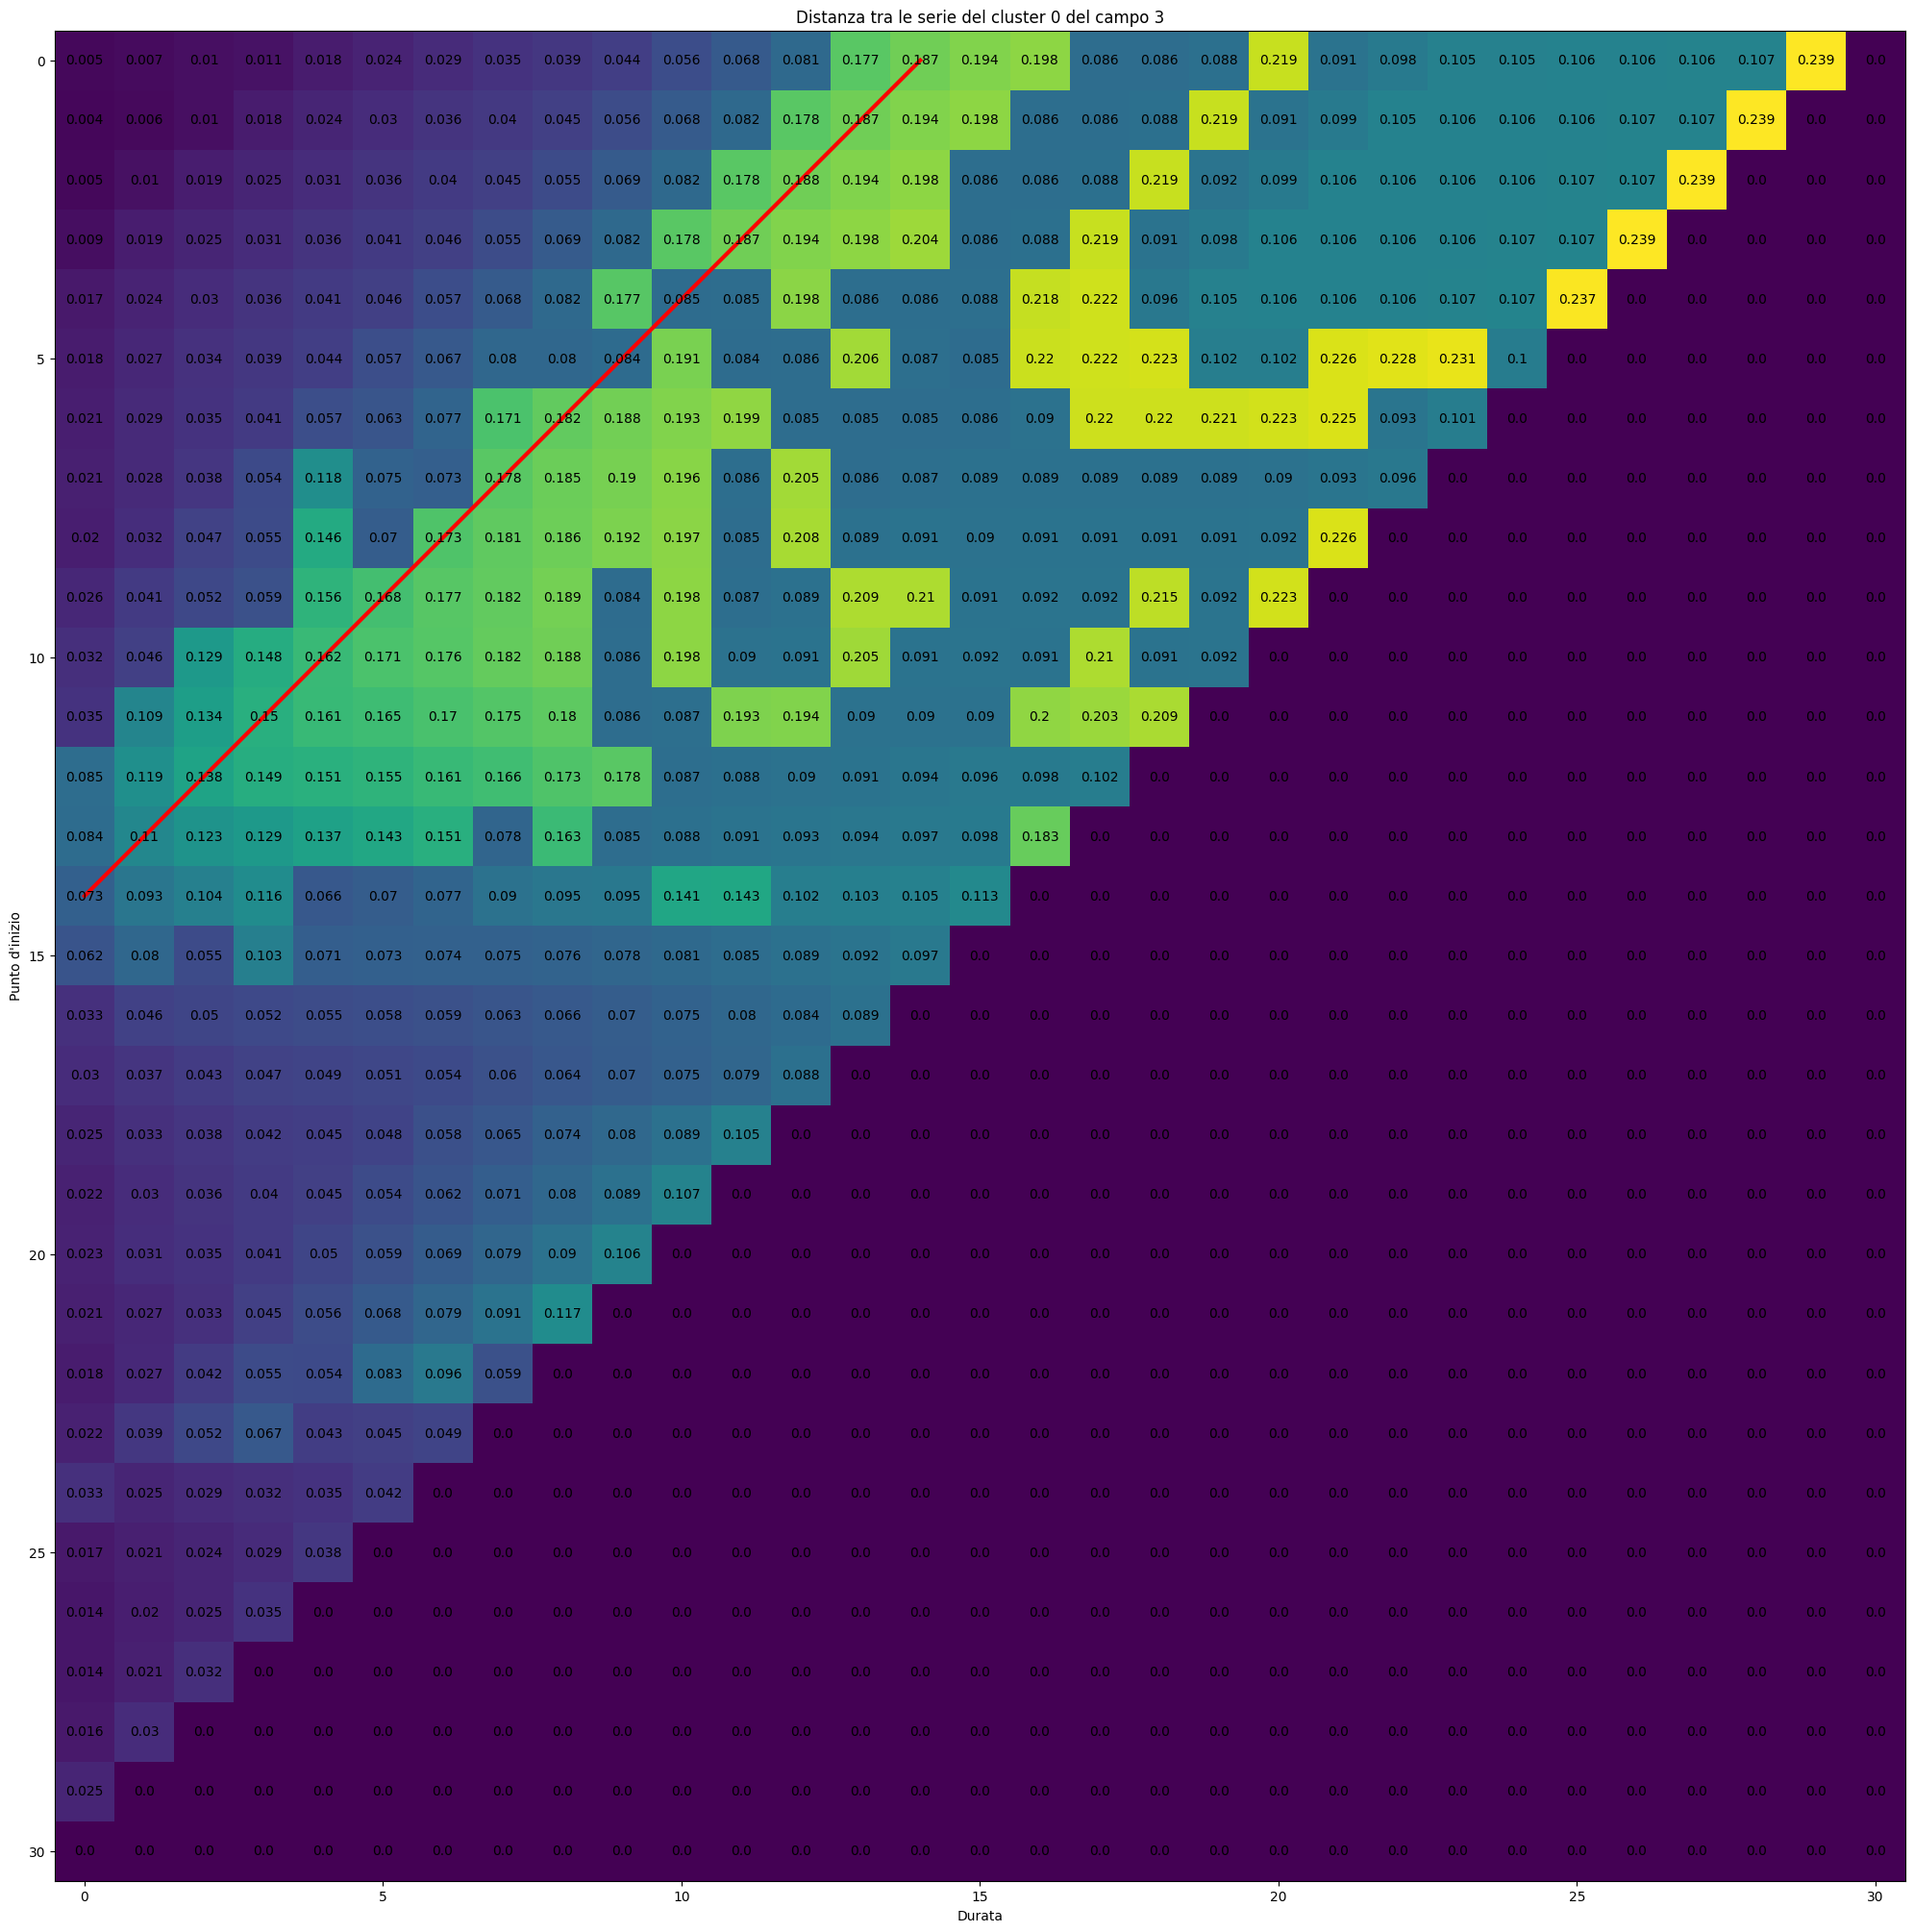

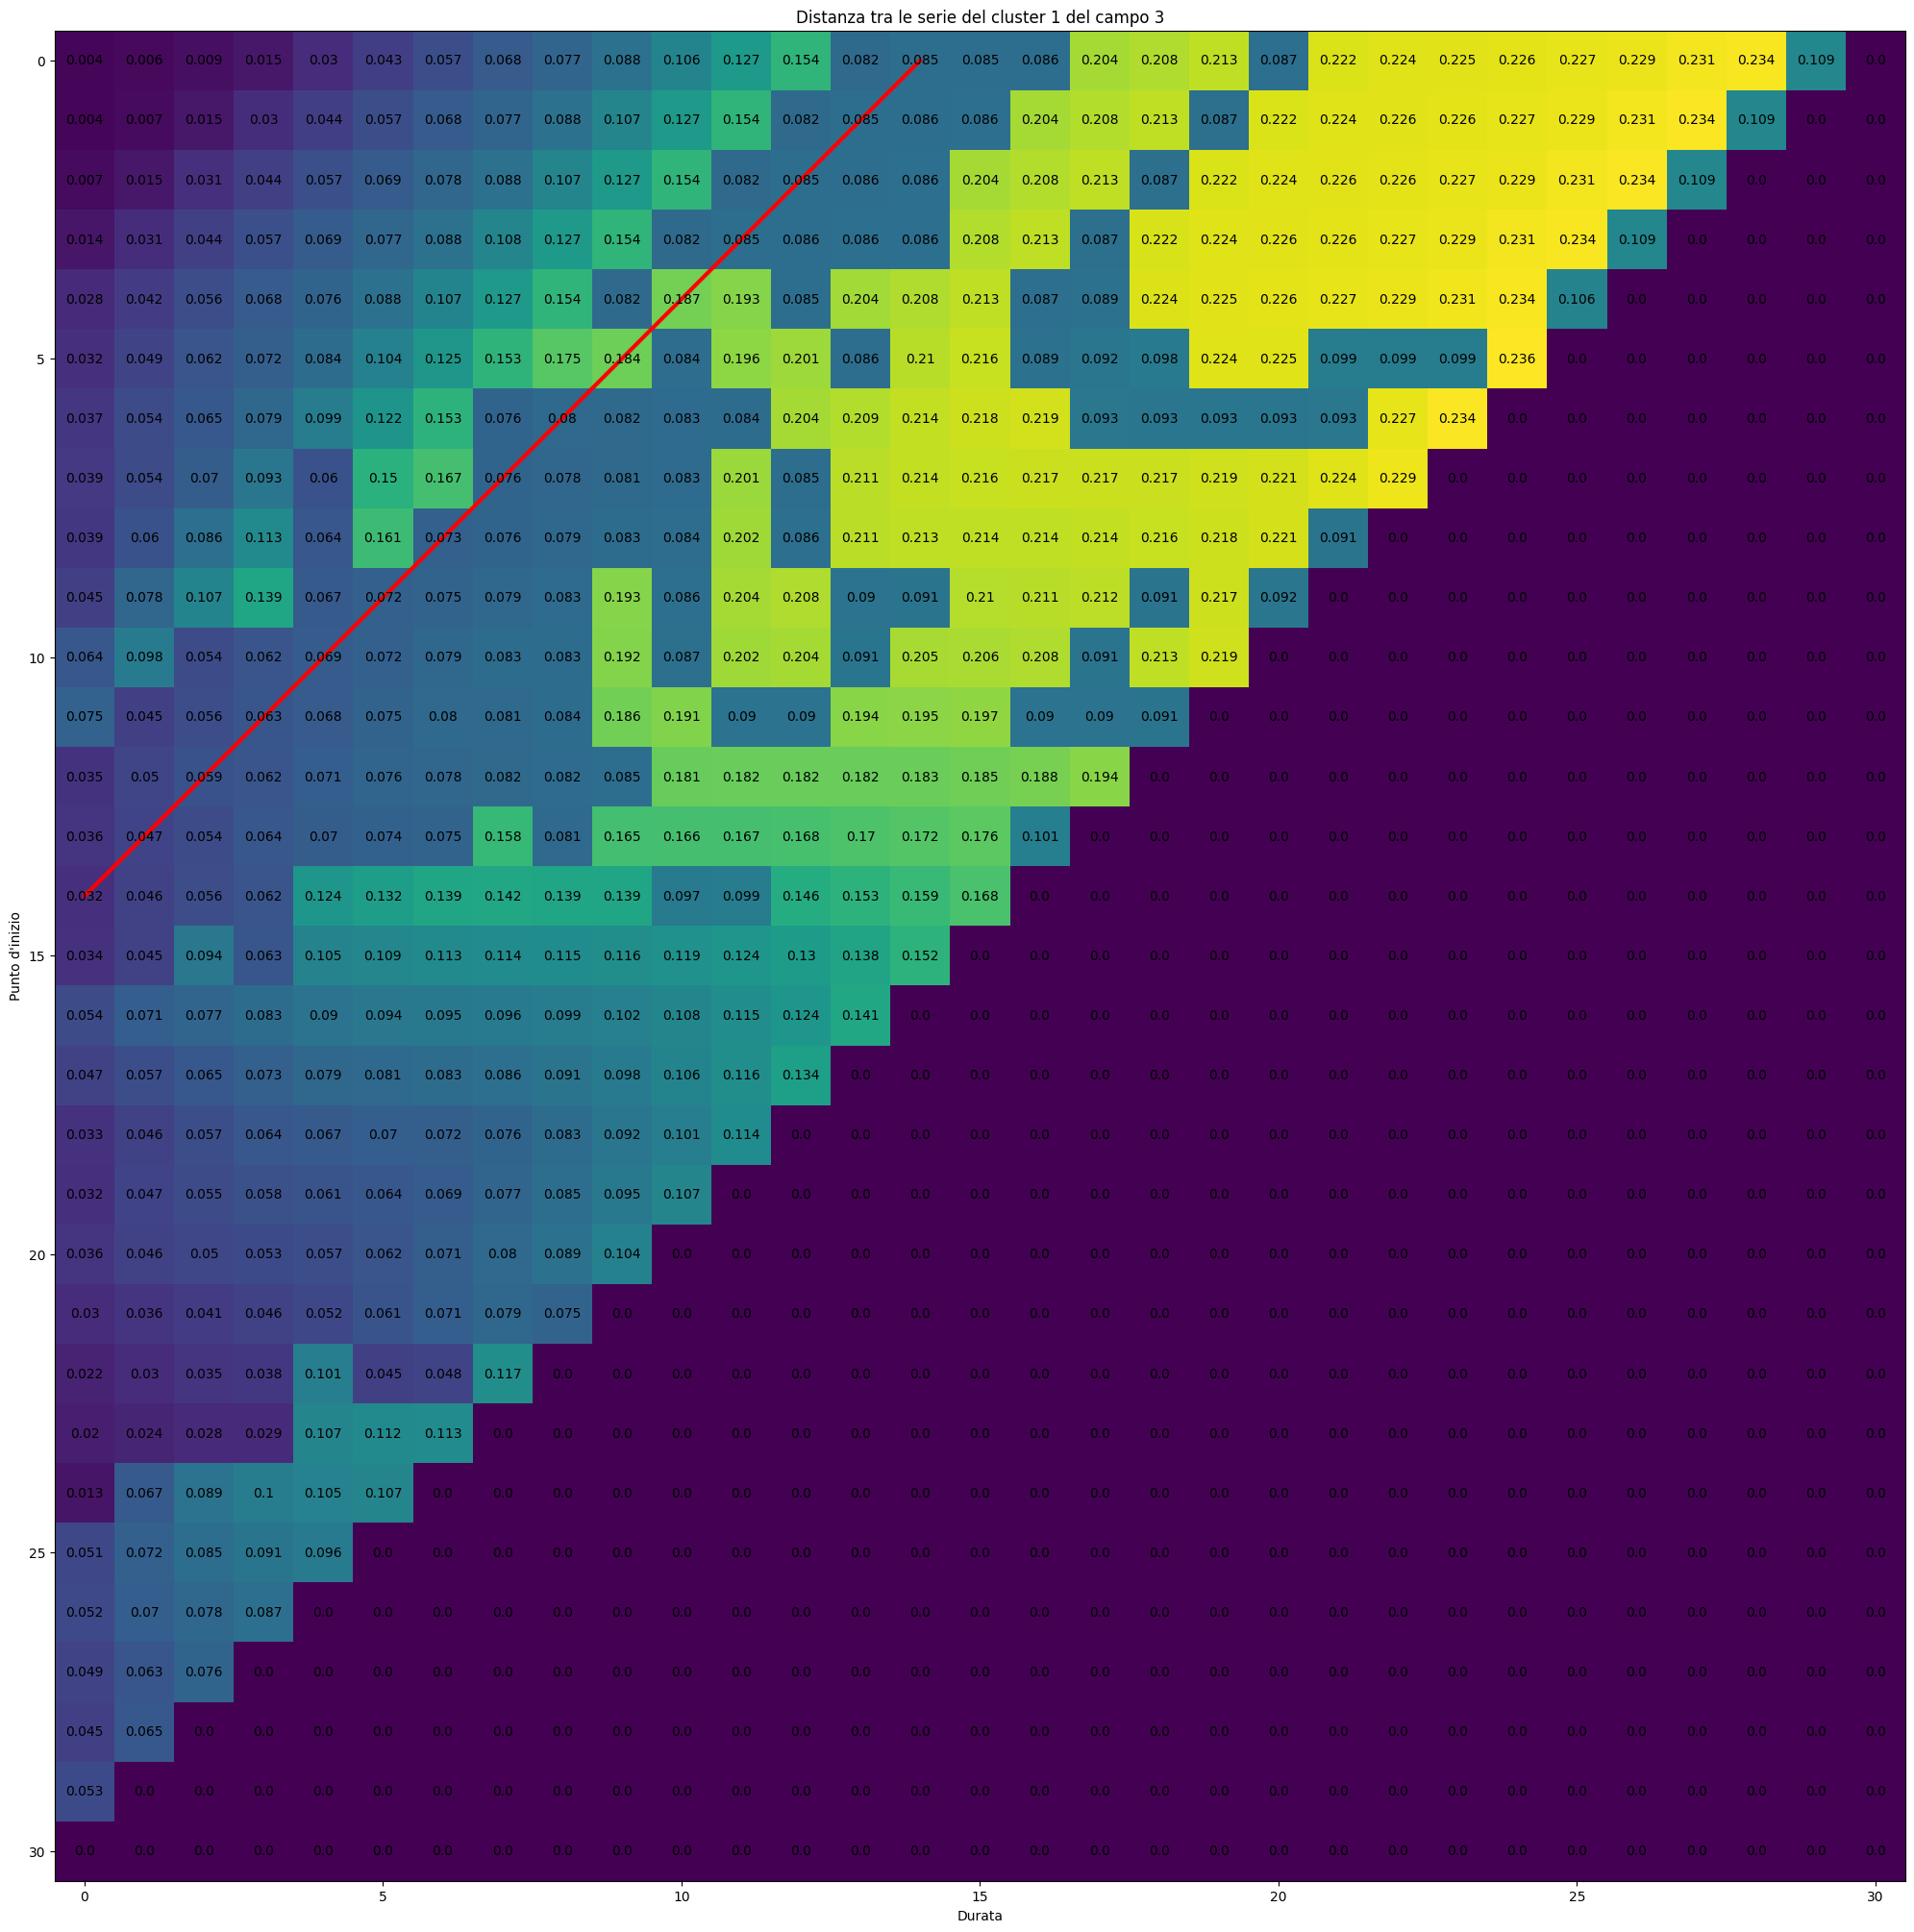

In [188]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_3[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 3')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_3.shape[0]):
        for j in range(0,coesione_3.shape[1]):
            c = np.round(coesione_3[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

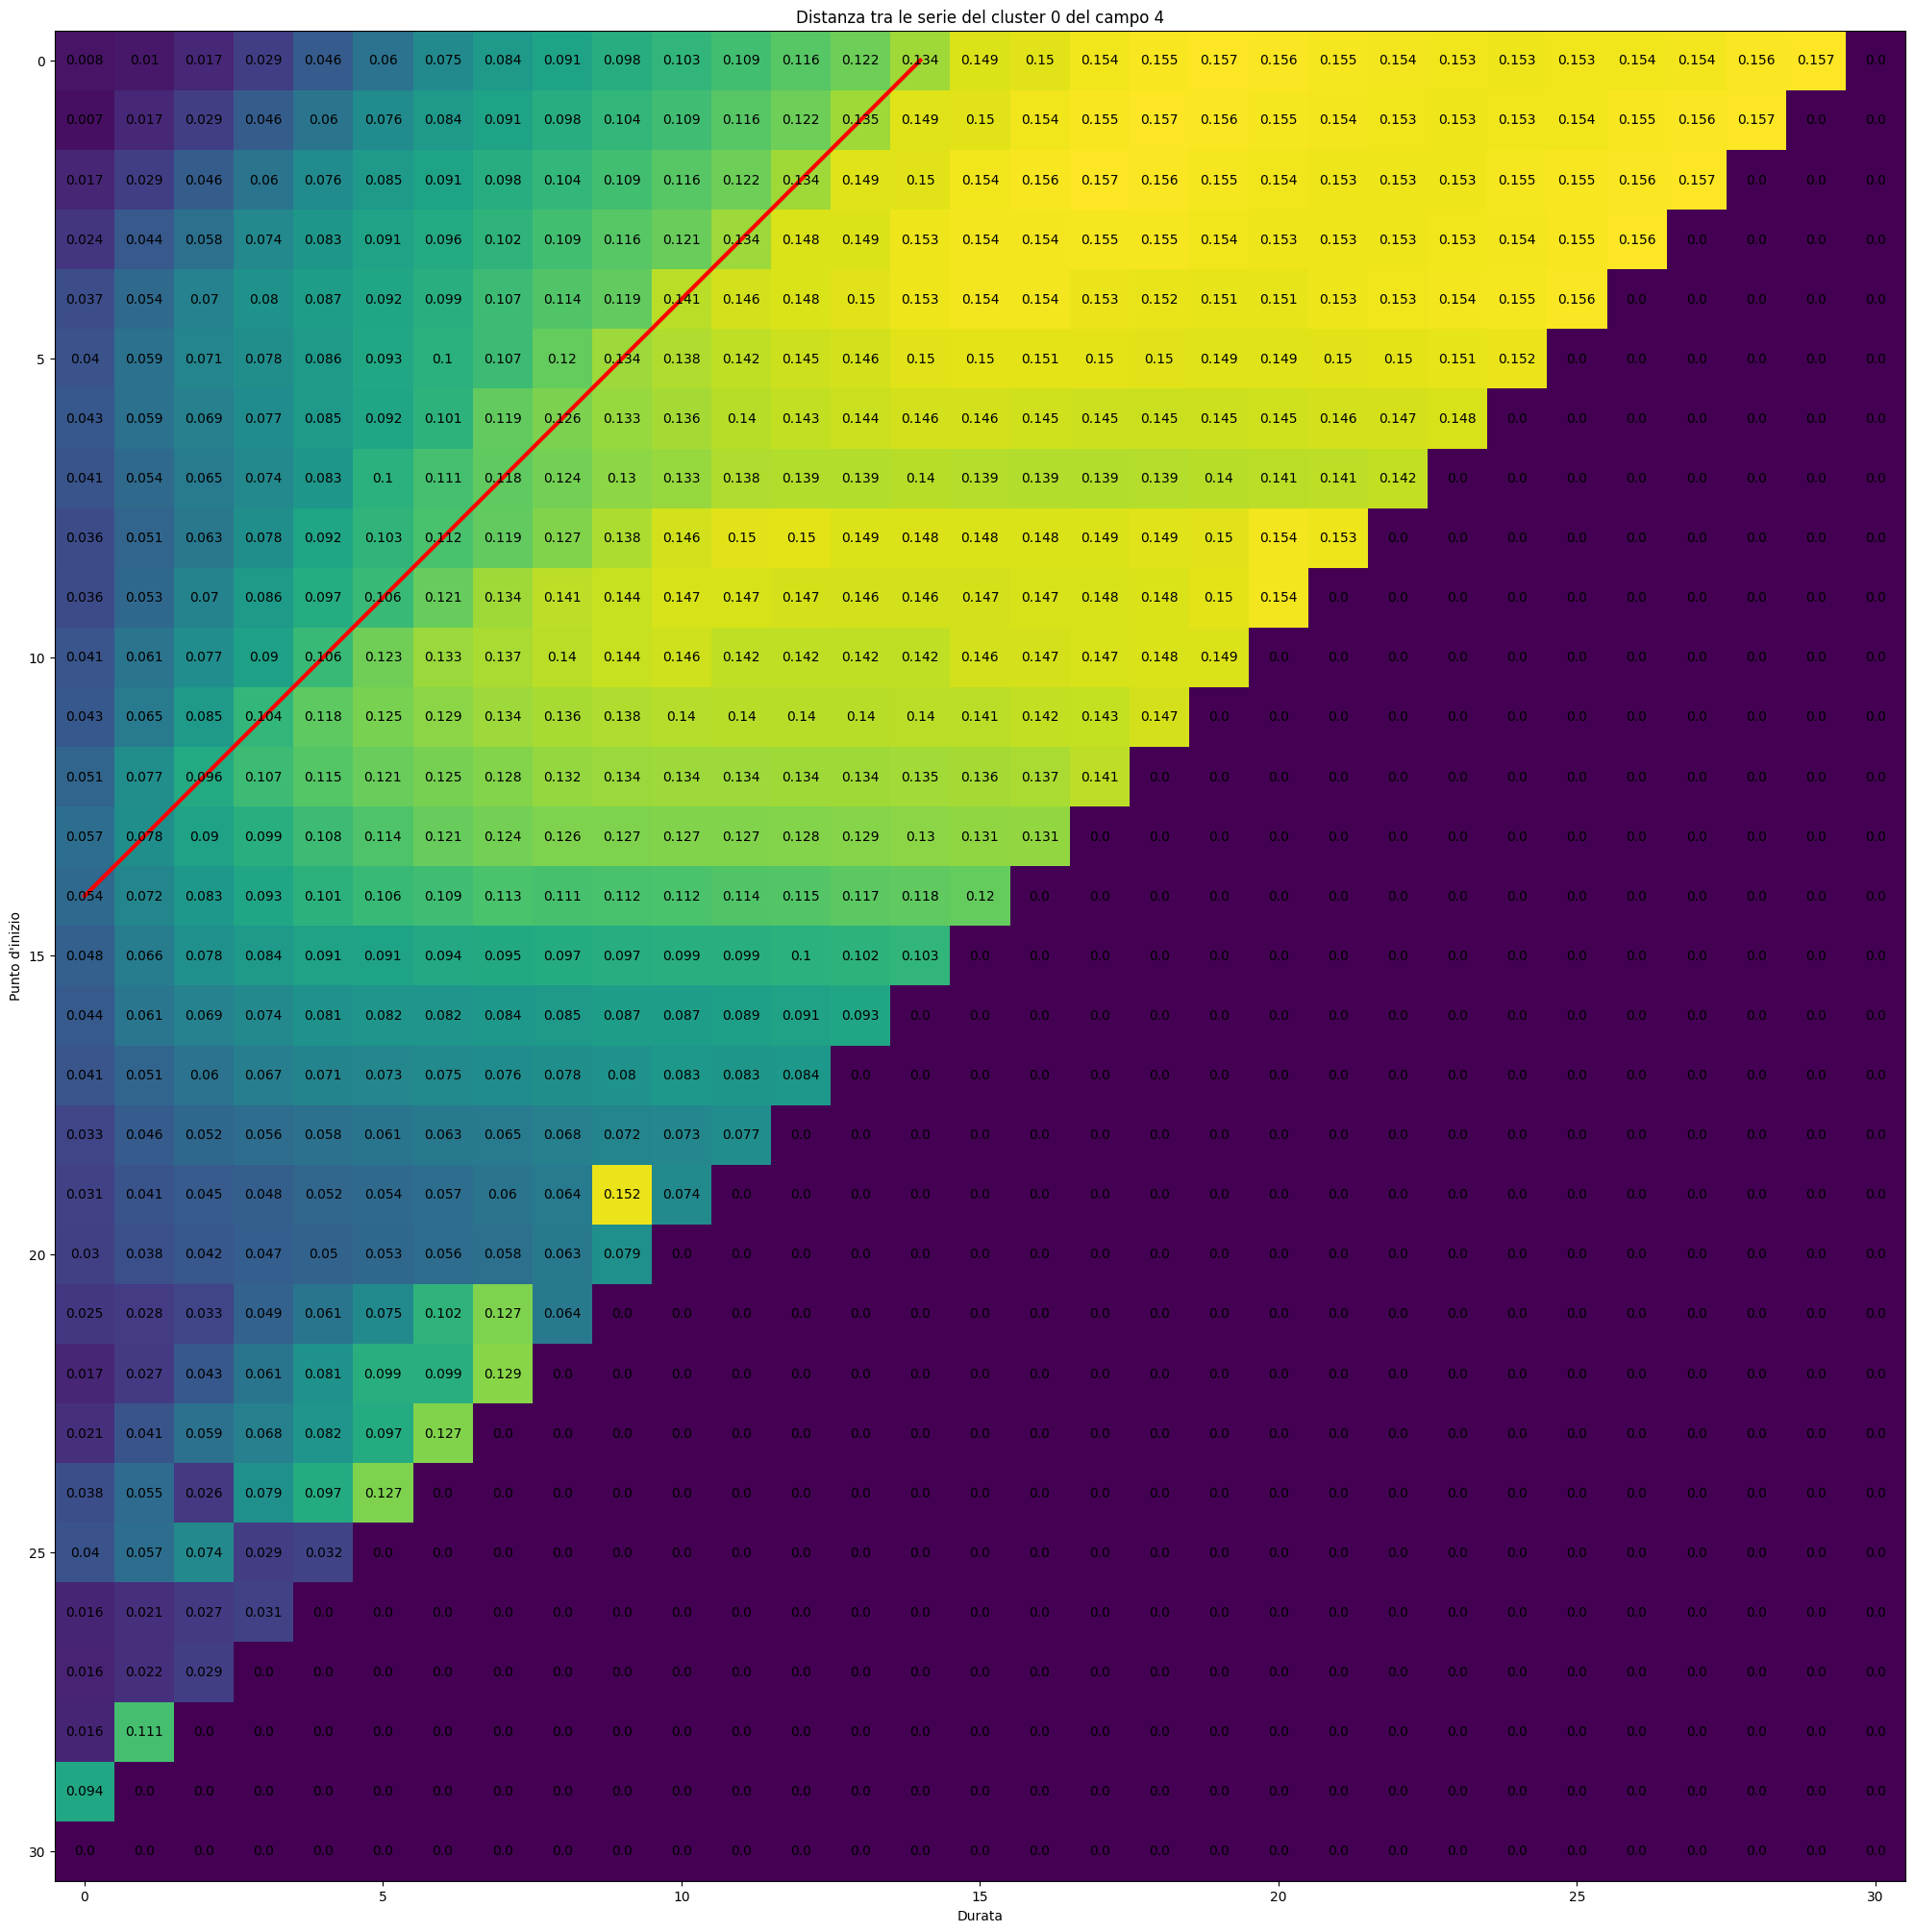

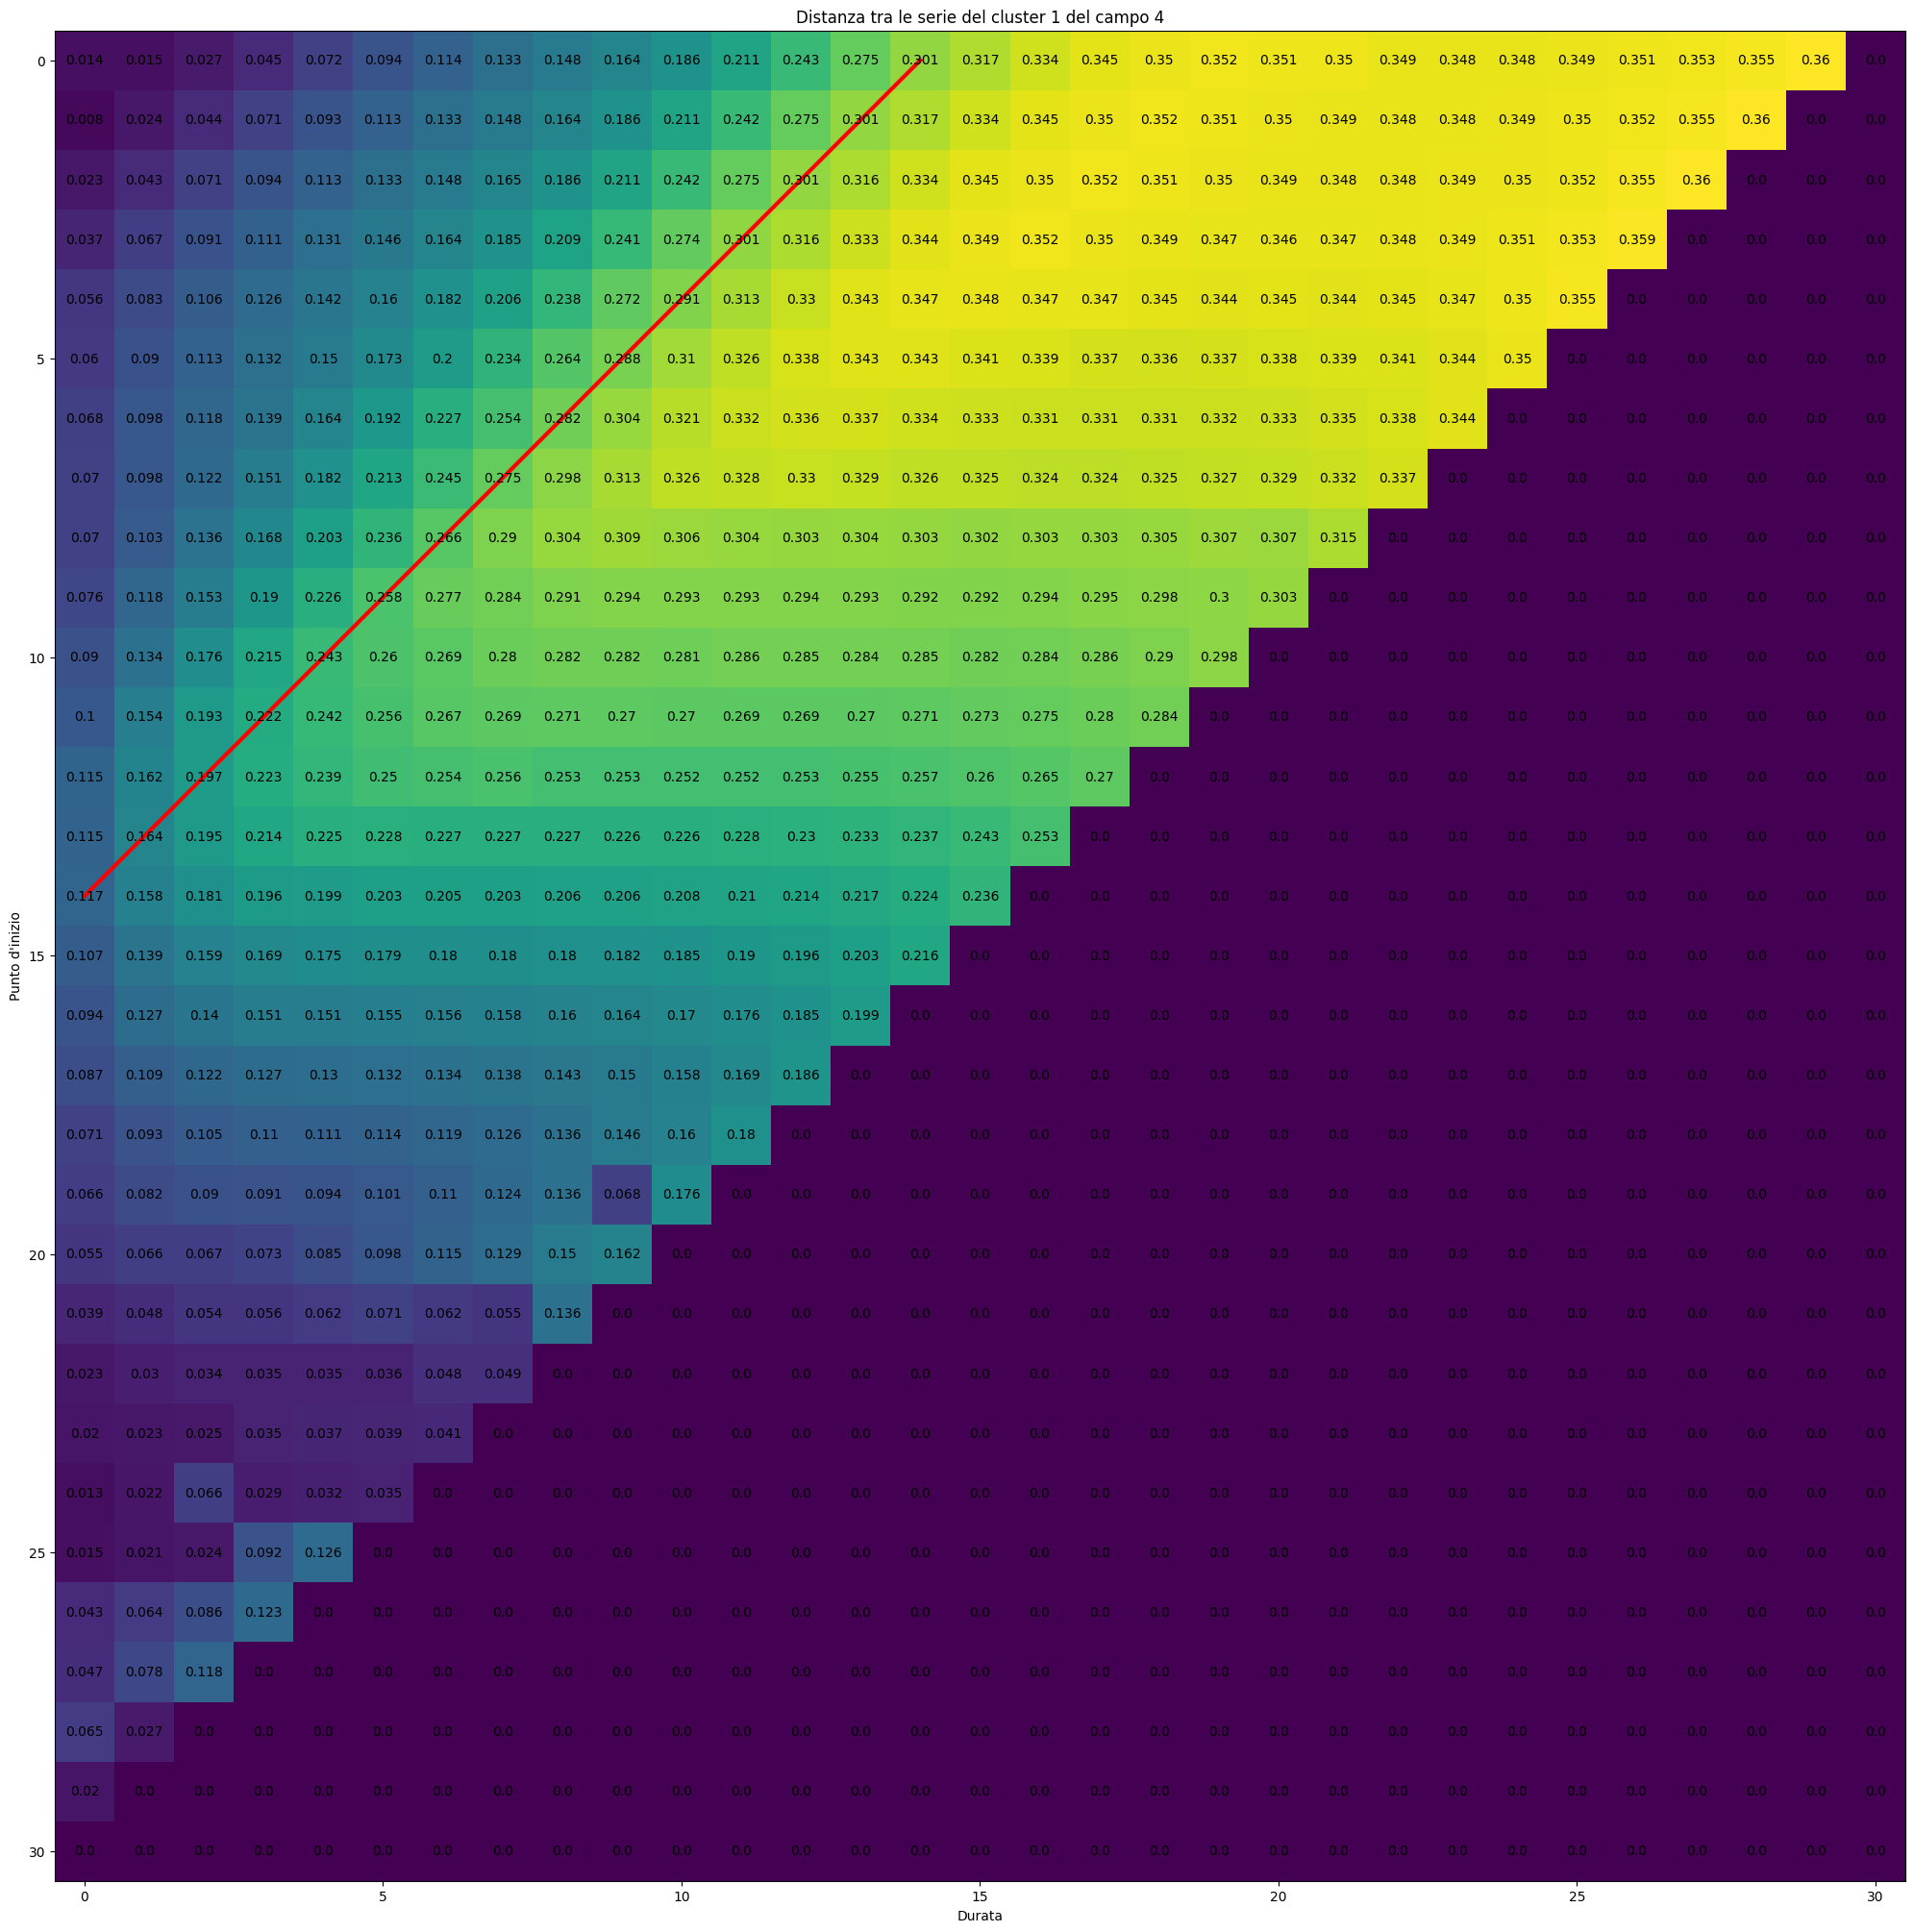

In [189]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_4[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 4')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_4.shape[0]):
        for j in range(0,coesione_4.shape[1]):
            c = np.round(coesione_4[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

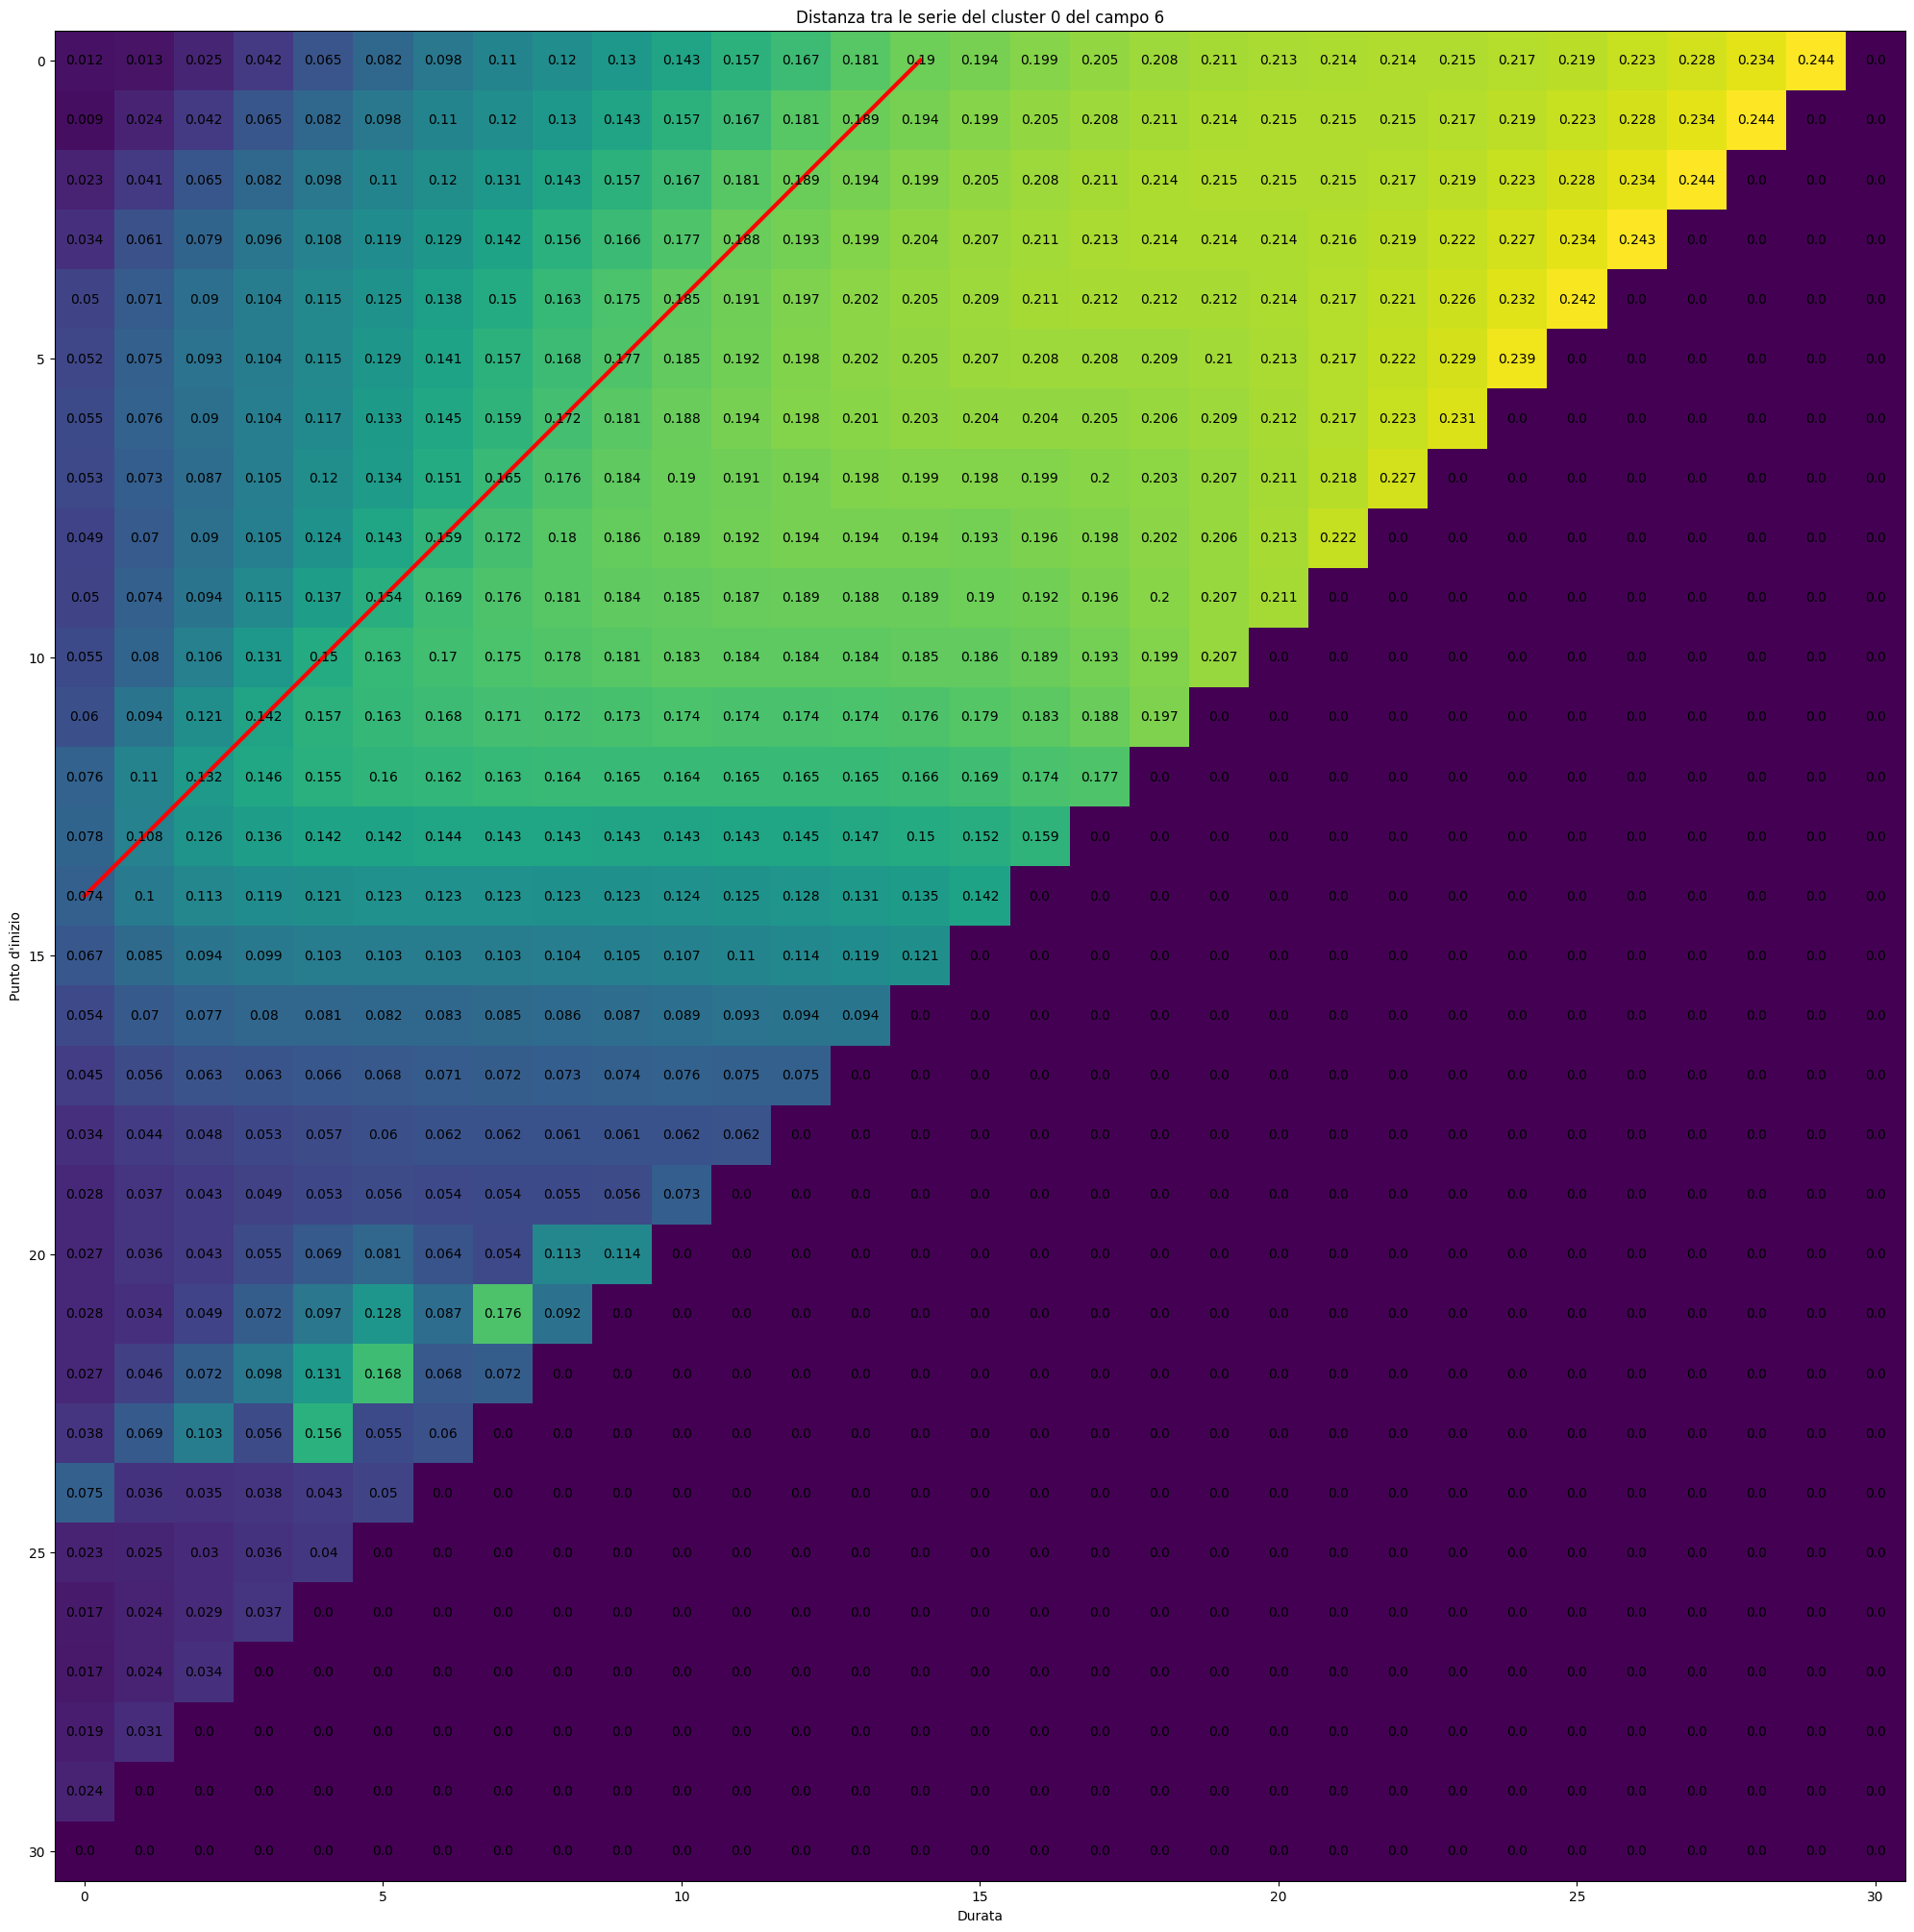

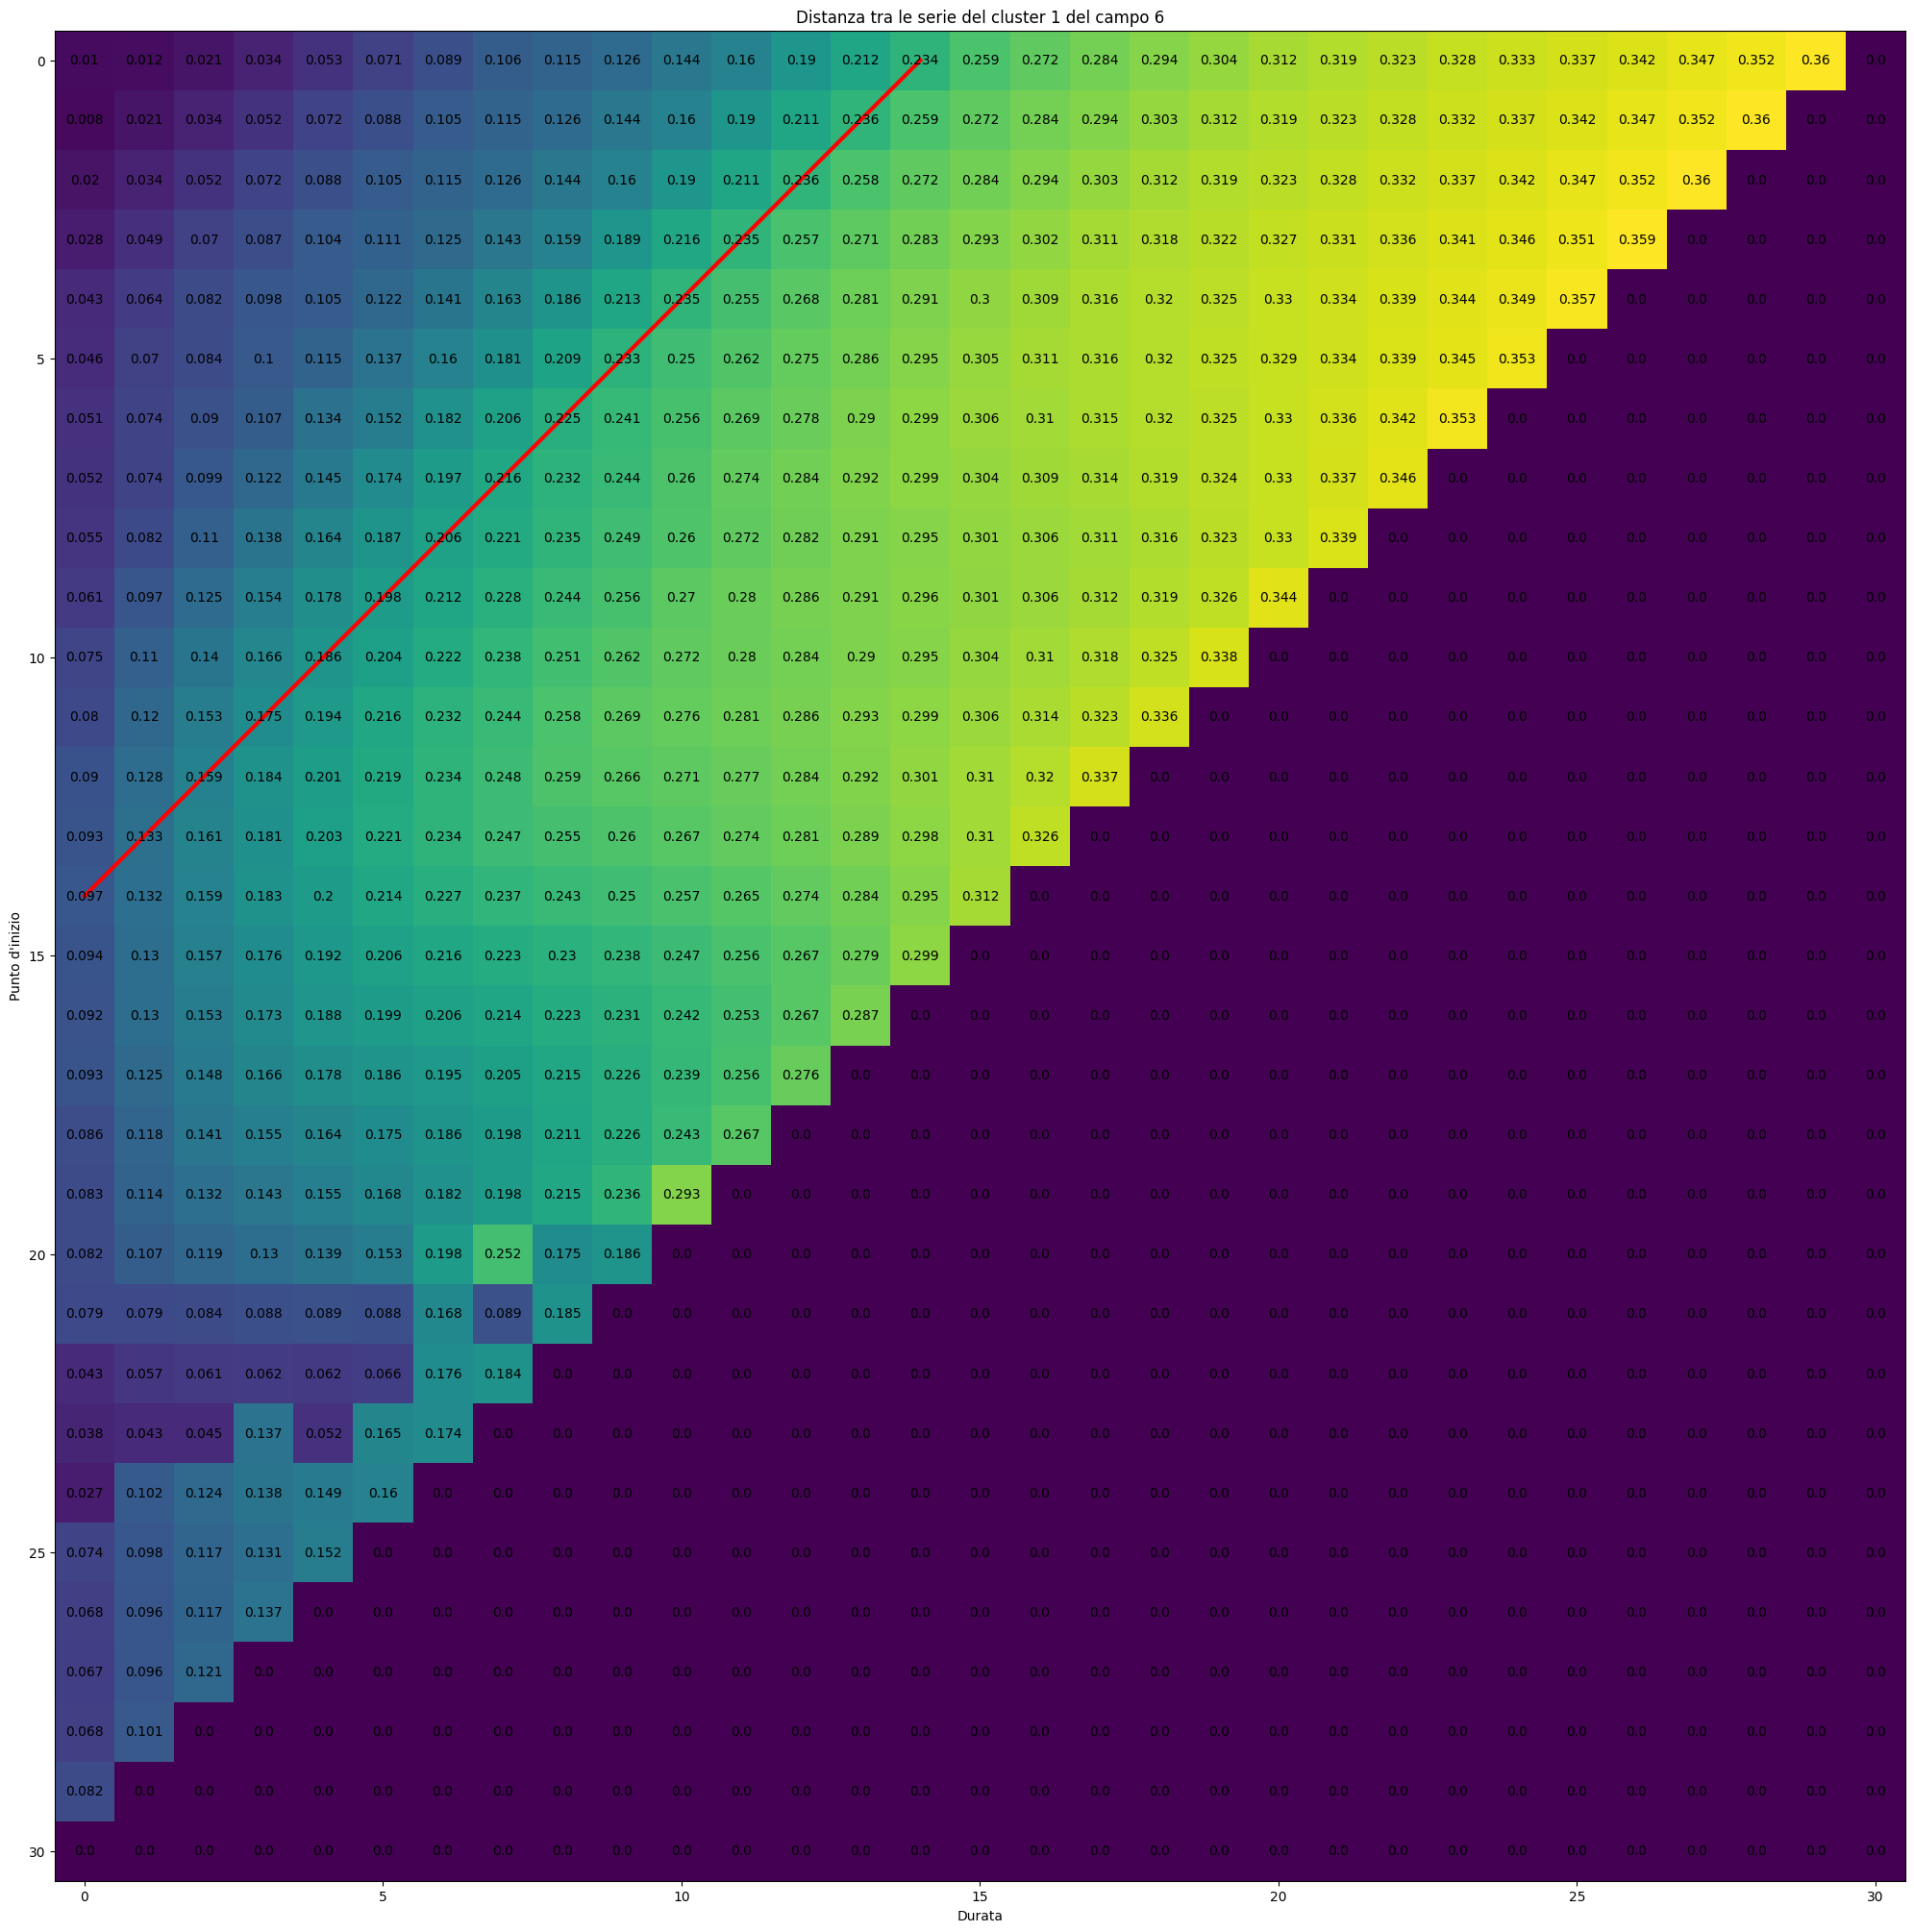

In [190]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_6[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 6')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_6.shape[0]):
        for j in range(0,coesione_6.shape[1]):
            c = np.round(coesione_6[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

# Andiamo a rappresentare i valori di separazione dentro delle matrici

x: 0 y:  0
0.6039062631700556
x: 0 y:  1
0.9212191420782139
x: 0 y:  2
0.9689997910741175
x: 0 y:  3
0.7341757311103791
x: 0 y:  4
0.6488717124678475
x: 0 y:  5
0.6398230448853242
x: 0 y:  6
0.6478237326171908
x: 0 y:  7
0.6527199431724673
x: 0 y:  8
0.663180436726572
x: 0 y:  9
0.6778170174321604
x: 0 y:  10
0.6908354506420415
x: 0 y:  11
0.6739243951031031
x: 0 y:  12
0.696832147688323
x: 0 y:  13
0.7903433334590051
x: 0 y:  14
0.7827132723799792
x: 0 y:  15
0.7840353694285858
x: 0 y:  16
1458529.5479302427
x: 0 y:  17
1904878.54026656
x: 0 y:  18
0.8451286186103228
x: 0 y:  19
2873531.5662501757
x: 0 y:  20
0.8554573791135123
x: 0 y:  21
0.8529809444114727
x: 0 y:  22
0.8506616066284677
x: 0 y:  23
2319305.5966867474
x: 0 y:  24
1901900.5051780667
x: 0 y:  25
0.8675384083142009
x: 0 y:  26
0.8762064550454011
x: 0 y:  27
0.8857032330365037
x: 0 y:  28
0.8968590167769226
x: 0 y:  29
0.9182155745206129
x: 1 y:  0
0.8174578353512609
x: 1 y:  1
0.6858966955349555
x: 1 y:  2
0.62870450555

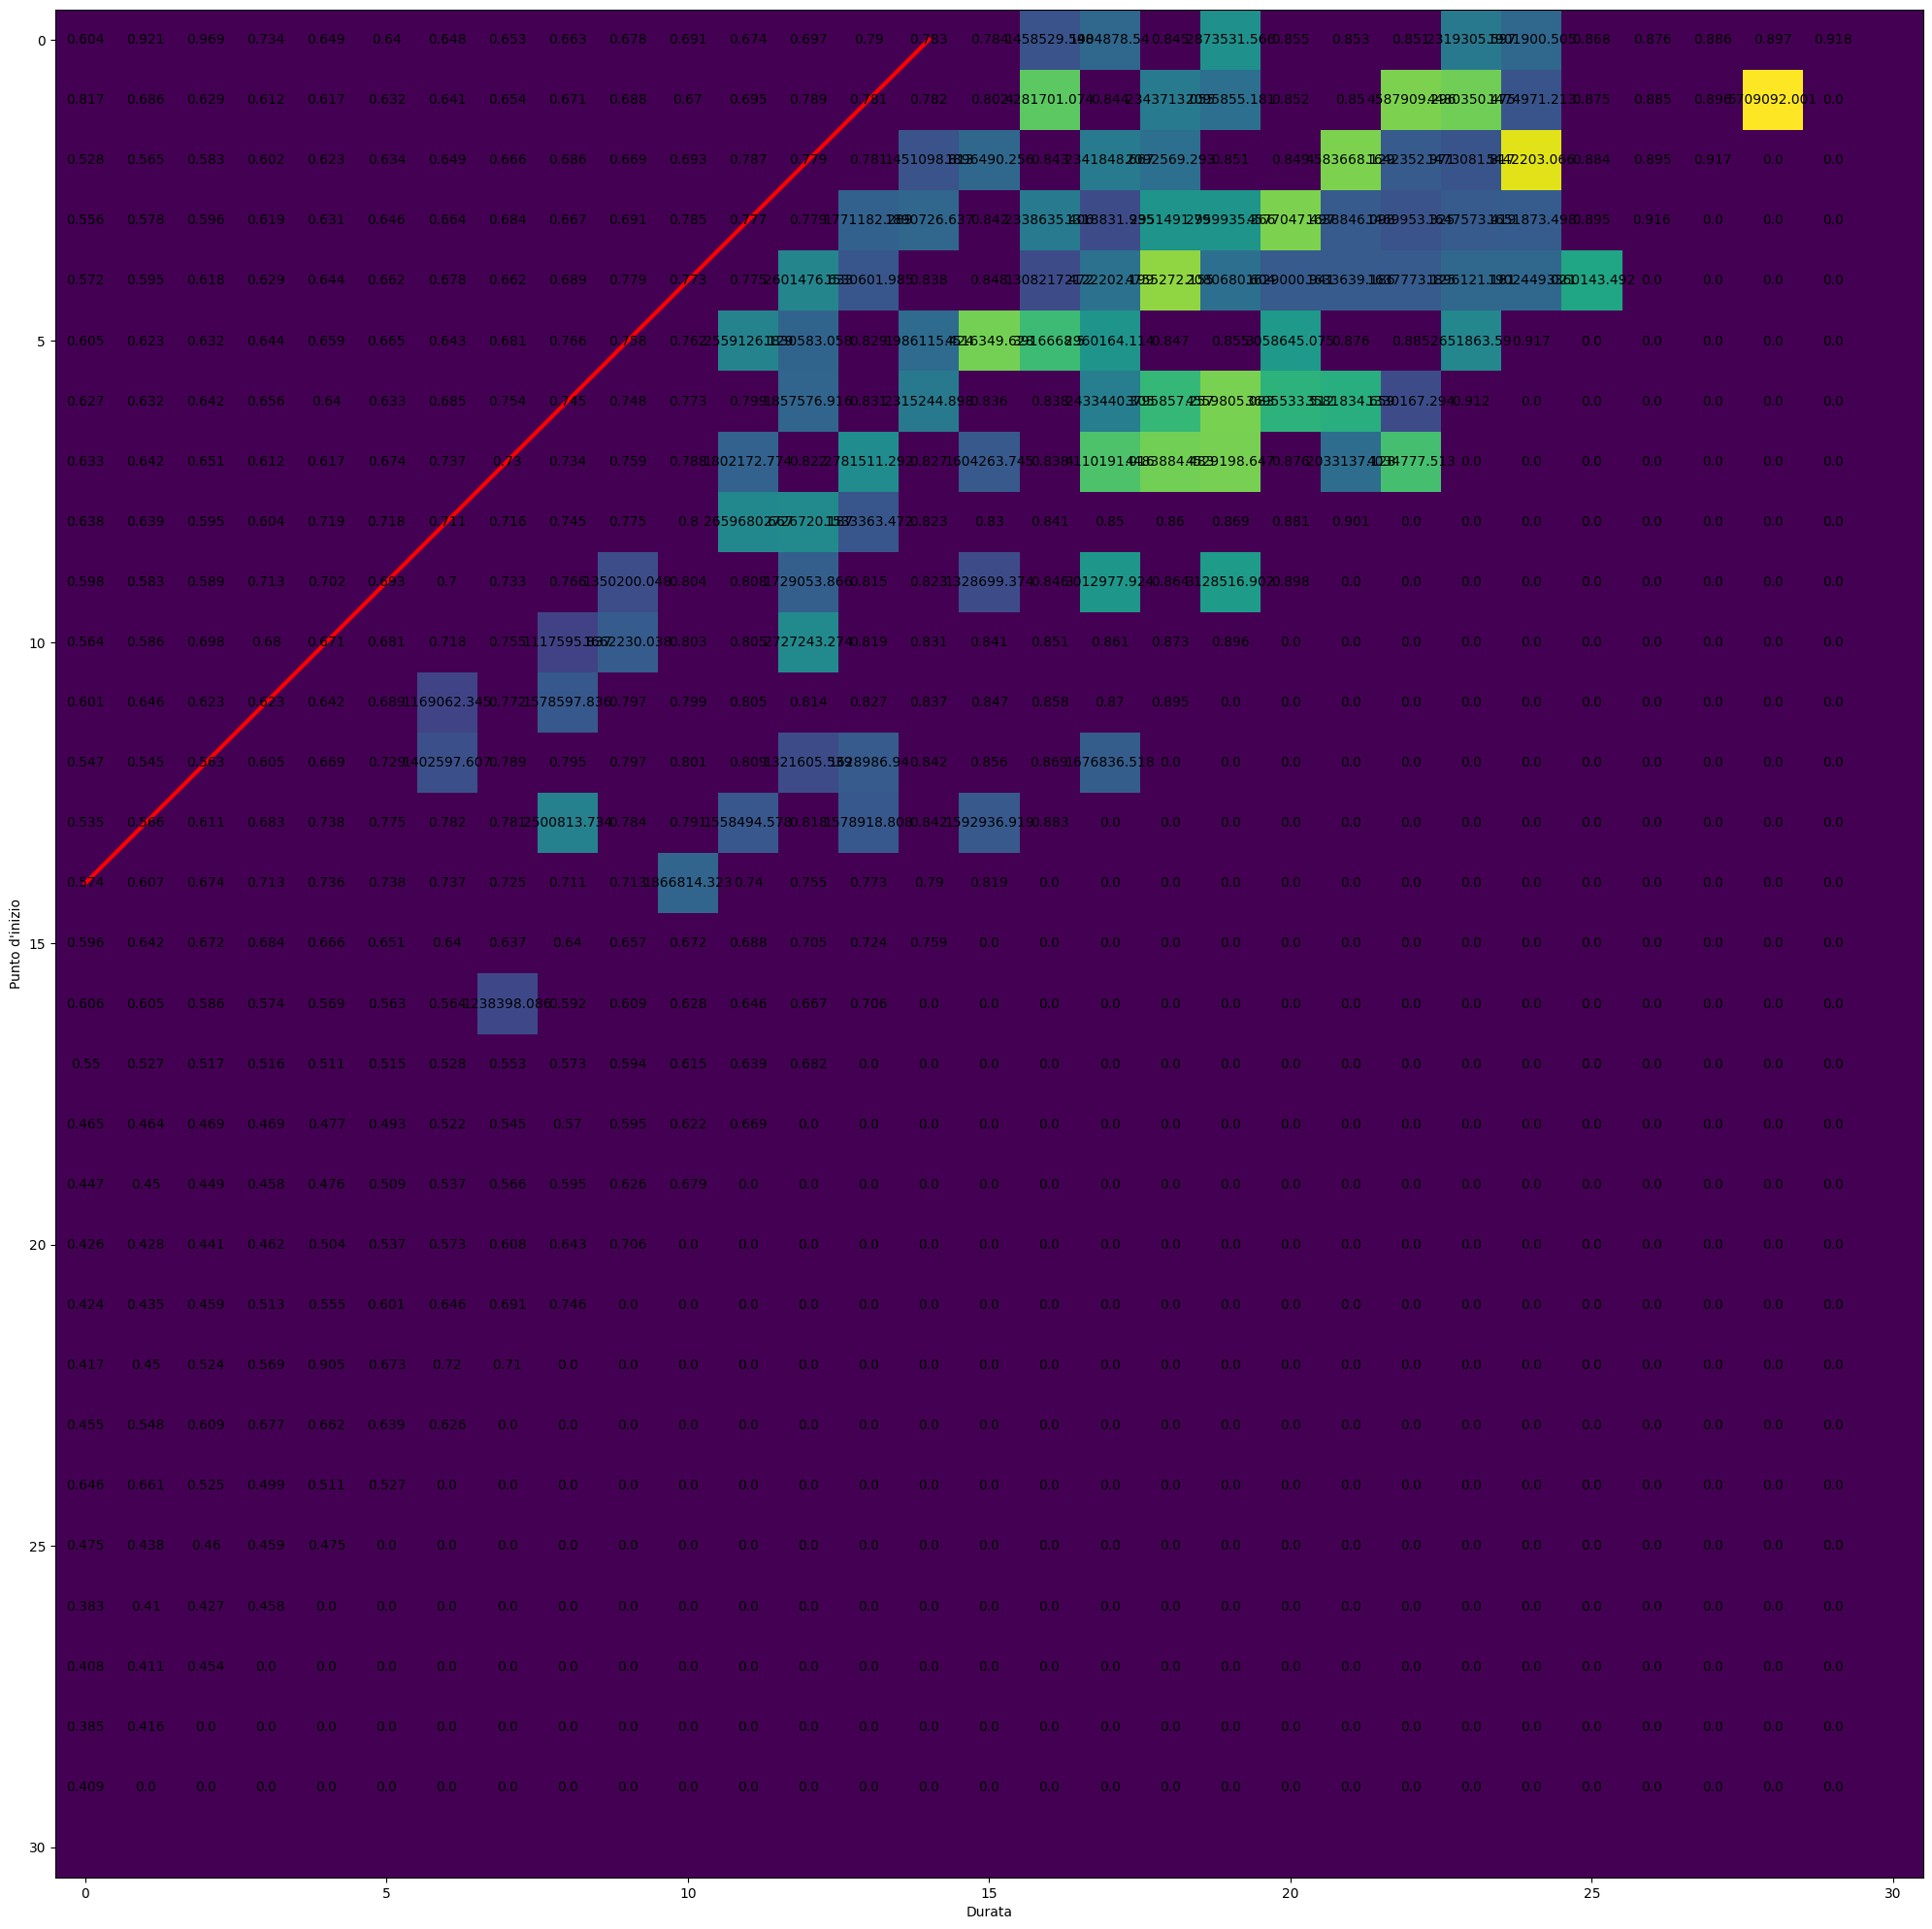

In [191]:

fig, ax = plt.subplots()
image = ax.imshow(davisBouldin3[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin3[i,j],decimals=3)
        print("x:",i,"y: ",j)
        print(davisBouldin3[i,j])
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()

0.6058225295695908
0.6640008771384137
0.5435639069867483
0.5057823575008628
0.49326449820235807
0.49153014211806334
0.4912155861748409
0.49559560668676184
0.5026085070693684
0.511420449127636
0.527572354440566
0.5445140936371016
0.5639463275697751
0.5806478519015924
0.5983120495525657
0.6067046757231291
0.6164405033678225
0.6230547841732972
4631826.437659244
2408328.5456355815
0.6476717035506667
4922862.039873709
7458541.680911588
5315421.685730619
5015923.497138993
0.6743521482611498
0.6786242441280721
2570878.019935705
7777045.682908313
0.6959551693977384
0.5743251498644395
0.4866817477560392
0.4819384120603015
0.4832461720960378
0.4849817091160783
0.4864051557186258
0.4920970379608292
0.5003013381111828
0.509204262117759
0.5258031561569094
0.5431908566320435
0.5627855847332877
0.5796613874355044
0.5974807797458515
0.6059749724686029
0.6157387837289524
0.6224026520771085
0.6289014904051161
0.6363026282451378
2434155.2131368513
4918059.790366774
6718052.793975136
4934774.4204463
48130

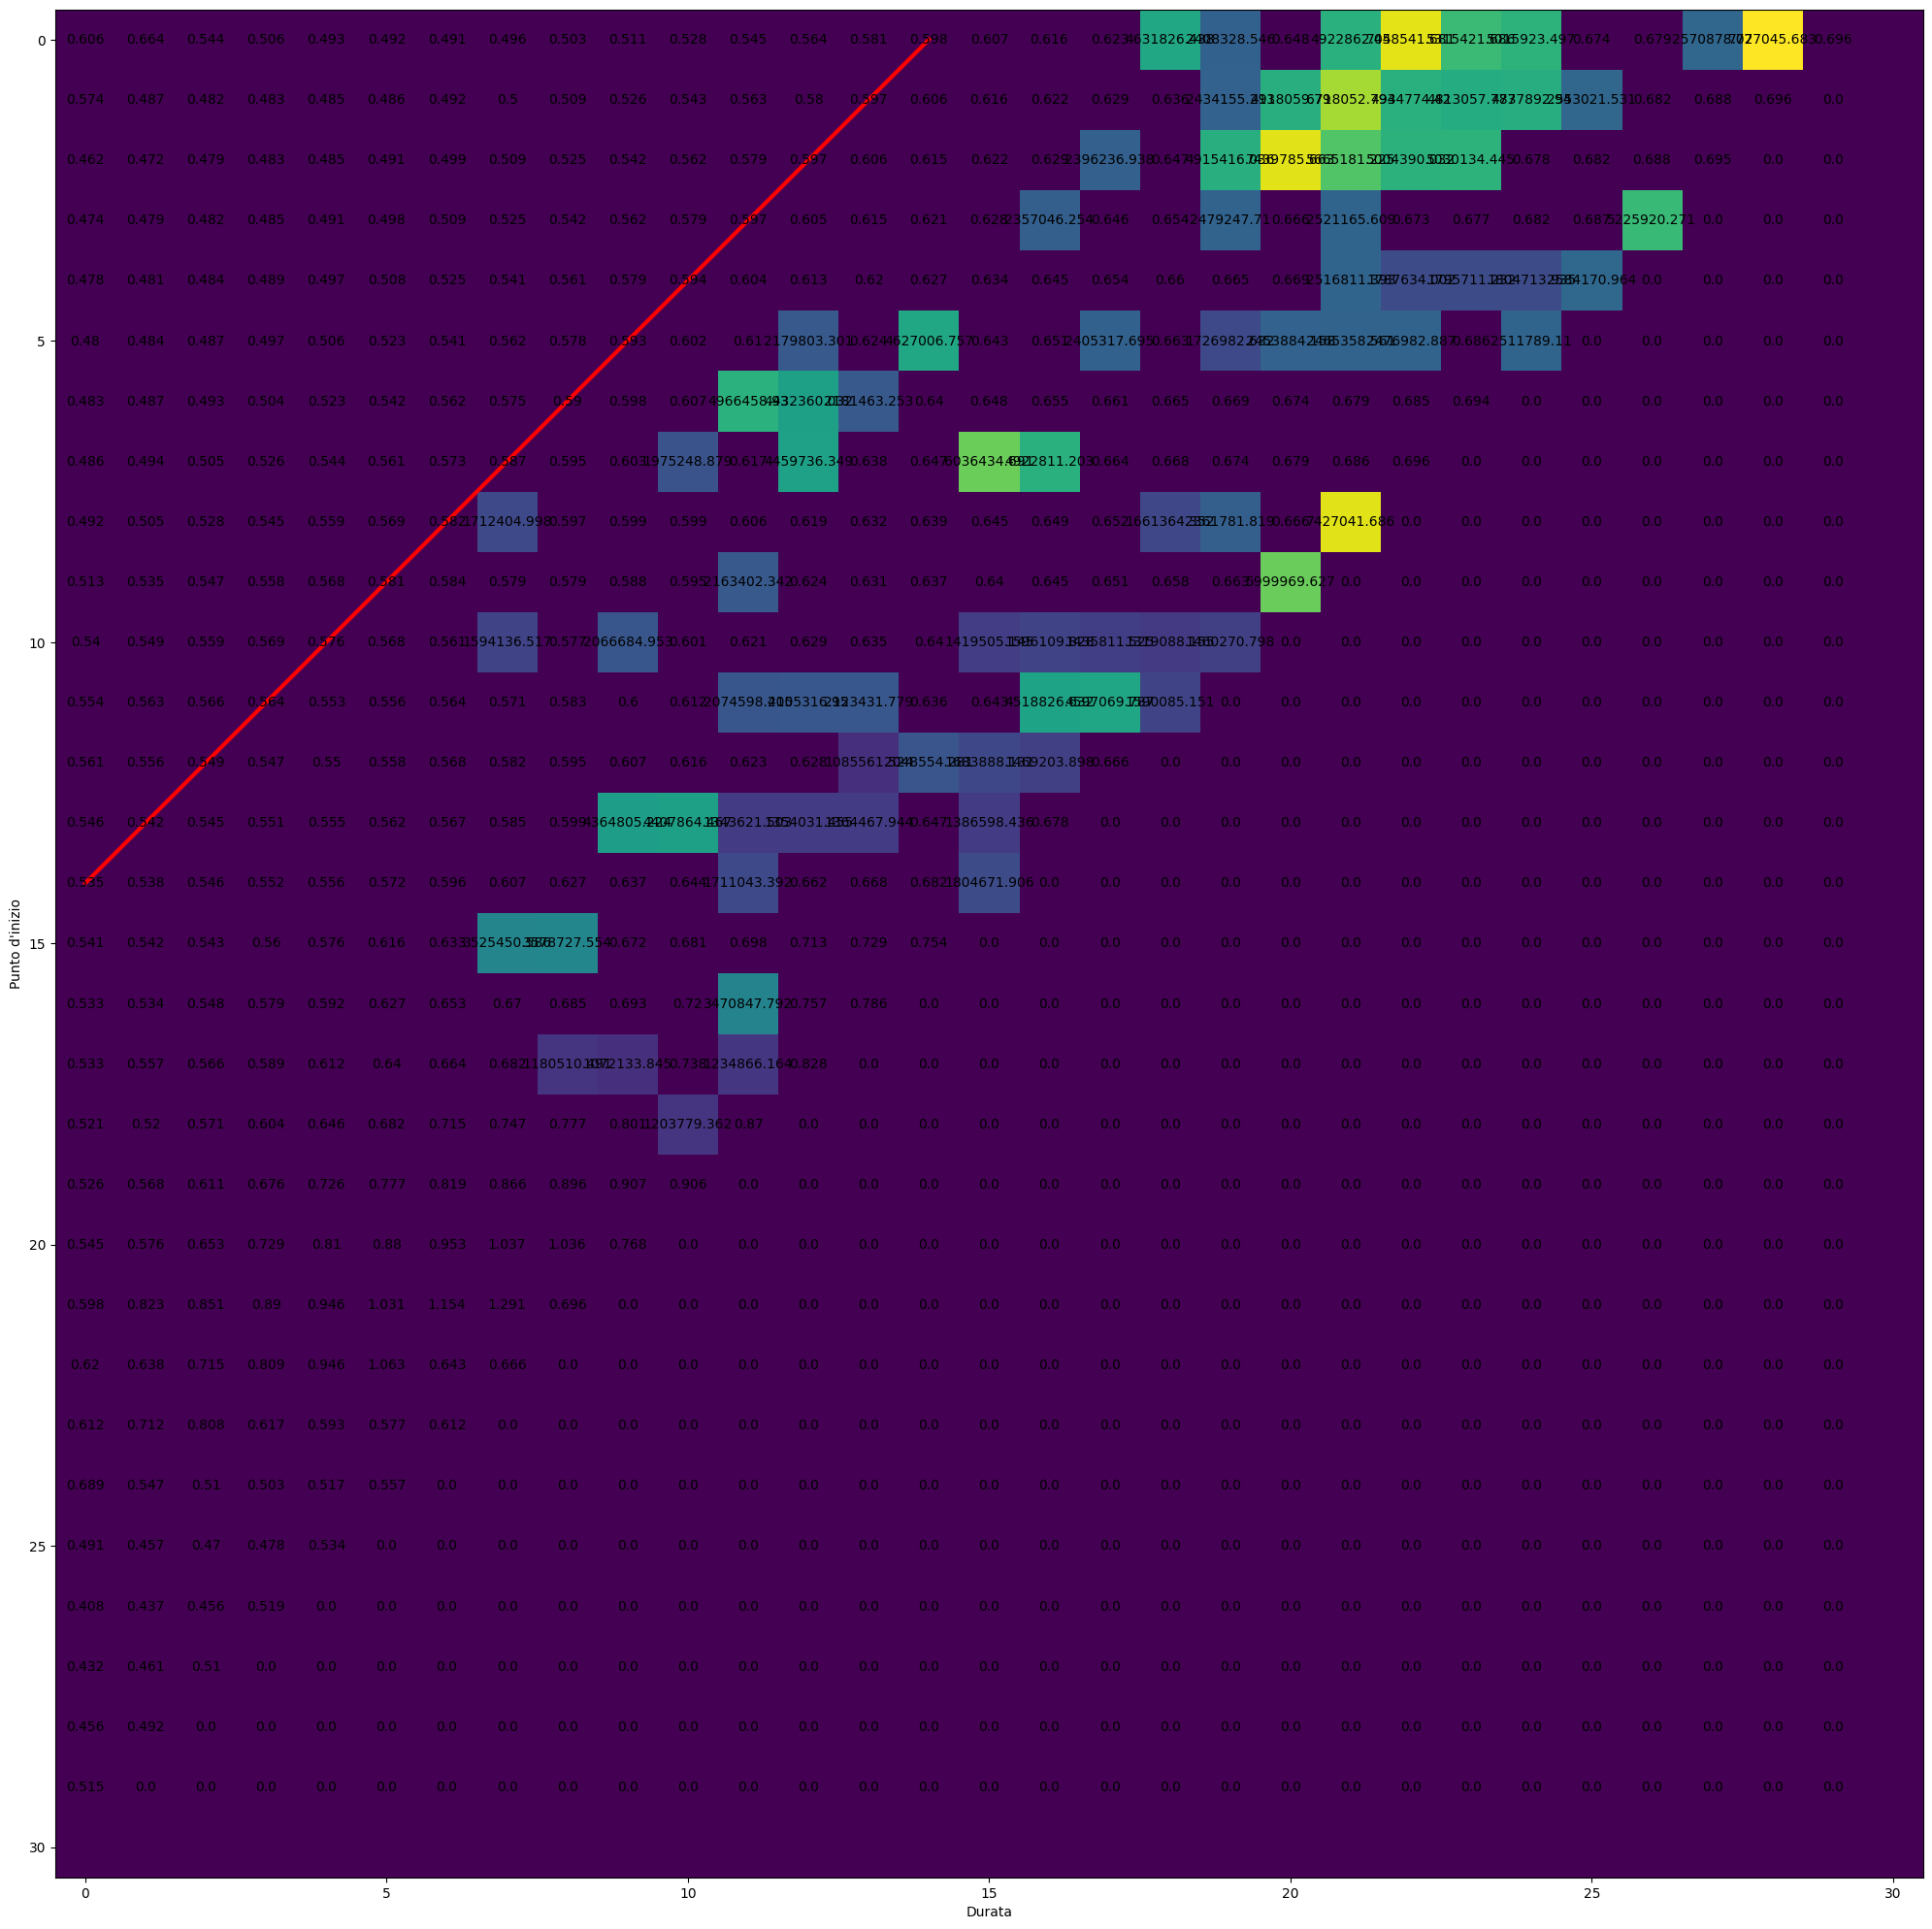

In [192]:
fig, ax = plt.subplots()
image = ax.imshow(davisBouldin4[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin4[i,j],decimals=3)
        print(davisBouldin4[i,j])
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()

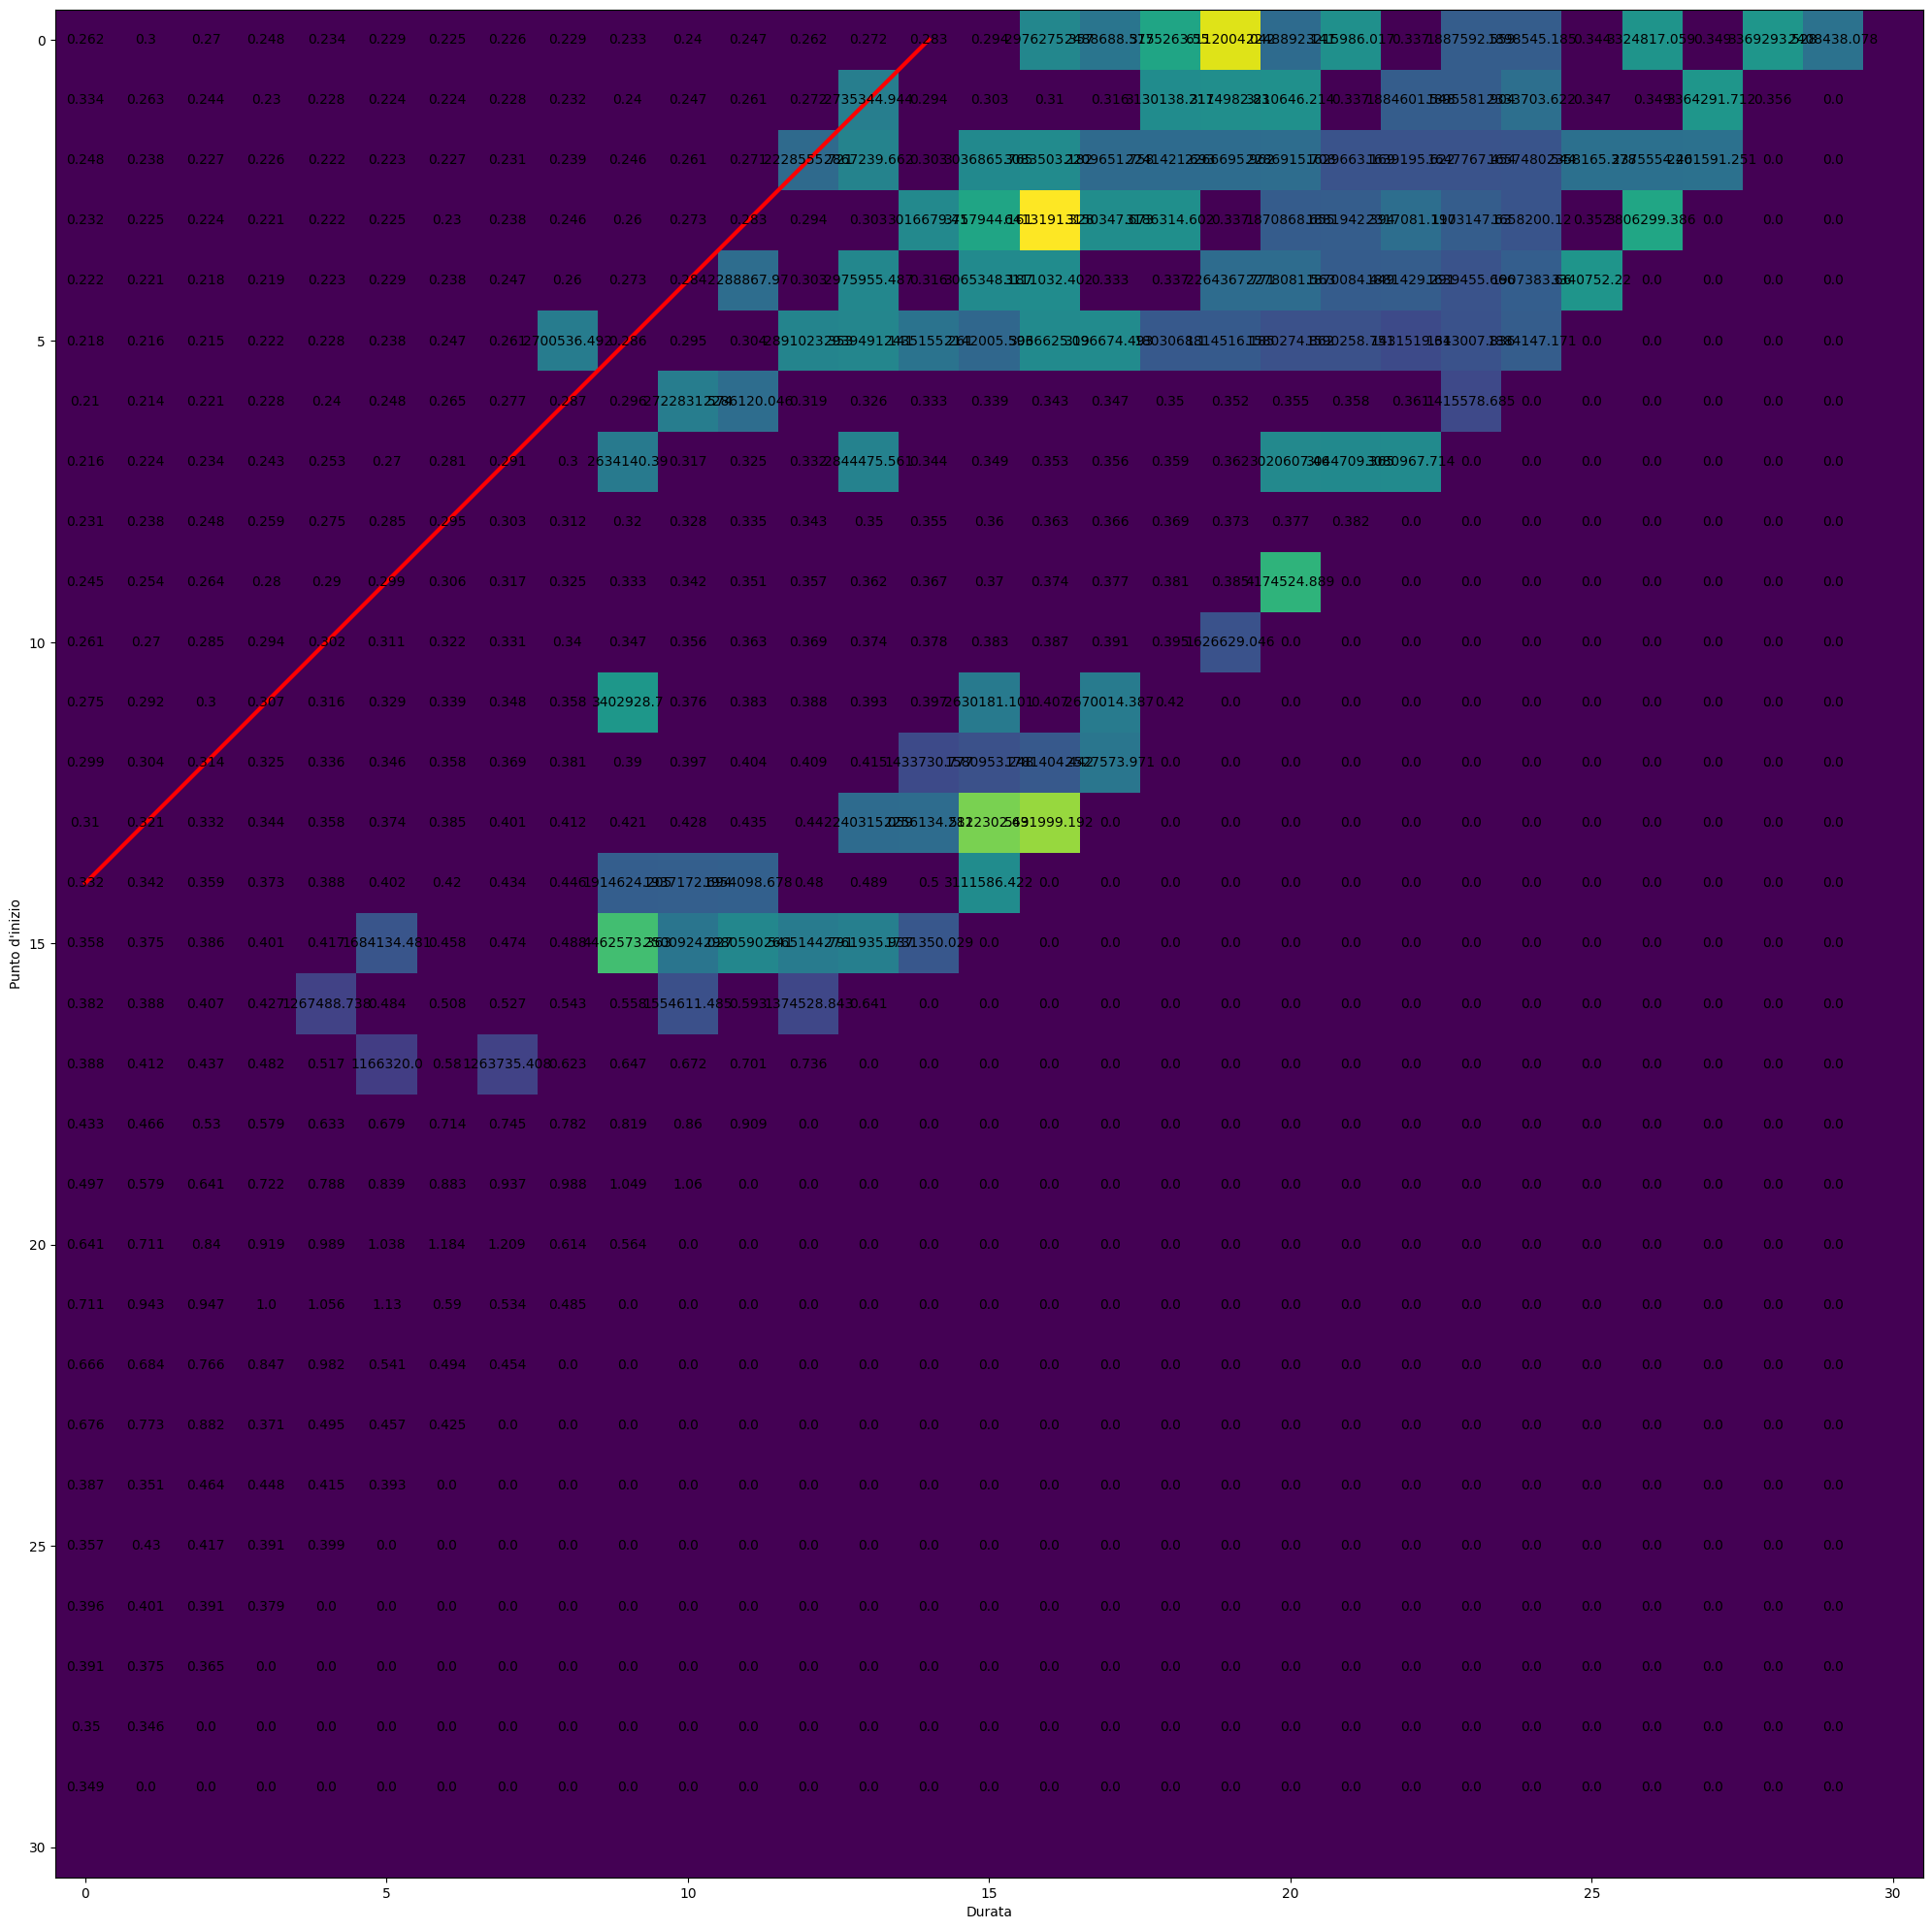

In [193]:
fig, ax = plt.subplots()
image = ax.imshow(davisBouldin6[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin6[i,j],decimals=3)
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()